# Big Mart Sales prediction

In this exercise we will analyse the data of the Big Mart Sales Competition [1].

## References

[1] https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/


## Content


## Problem statement
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store. Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

## Data
Train  data set: 8523

Test  data set: 5681
 
| Item_Identifier | Unique product ID |
| -------- | ---------- |
| Item_Weight| Weight of product | 
| Item_Fat_Content| Whether the product is low fat or not |
| Item_Visibility | The % of total display area of all products in a store allocated to the particular product |
| Item_Type | The category to which the product belongs |
| Item_MRP | Maximum Retail Price (list price) of the product |
| Outlet_Identifier | Unique store ID |
| Outlet_Establishment_Year | The year in which store was established |
| Outlet_Size | The size of the store in terms of ground area covered |
| Outlet_Location_Type | The type of city in which the store is located |
| Outlet_Type | Whether the outlet is just a grocery store or some sort of supermarket |
| Item_Outlet_Sales | Sales of the product in the particulat store. This is the outcome variable to be predicted. |


# Hypotheses generation

### Store Level Hypotheses

| Hypotheses name | Description | Variable |
| -------- | ---------- | ---------- |
| Population Density | Stores located in densely populated areas should have higher sales because of more demand | N/A | 
| Store Capacity | Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place | outlet_size / outlet_type | 
| Store location | Stores located in urban cities should have higher sales because of the higher income levels of people there. Stores that are in neighbourhoods that are recidential or where there are many offices will have higher sales because of better access to costumers. Also stores keeping the right set of products to meet the local needs of customers will have higher sales | outlet_location_type | 
| Store age | Stores that have been in the same place for a very long time may have higher sales because personal relationships with local costumers have been built | outlet_stablishment_year | 
| Store maintenance | Stores which are well-maintained and managed by polite and humble people are expected to have higher footfall and thus higher sales | N/A | 
| Competitors | Stores having similar establishments nearby should have less sales because of more competition | N/A | 


### Product Level Hypotheses

| Hypotheses name | Description | Variable |
| -------- | ---------- | ---------- |
| Utility | Daily use products should have a higher tendency to sell as compared to the specific use products. Also products such are ready-made-meals, fruits and snacks | item_type/item_weight?/item_fat_content? | 
| Display Area and visibility | Products which are given bigger shelves in the store, probably towards the entrance, are likely to catch attention first and sell more | item_visibility | 
| Advertising | Better advertising of products in the store will should higher sales in most cases | N/A | 
| Promotional Offers | Products accompanied with attractive offers and discounts will sell more | N/A | 



# Understand the data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

train = pd.read_csv('./Train.csv')
test = pd.read_csv('./Test.csv')

train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train, test], ignore_index=True)
data.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [7]:
data.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

Observations:
1. The missing values of the Item_Outlet_Sales come from the test dataset.
1. The missing values of Item_Weight and Outlet_Size need to be imputed.

In [8]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Observations:
1. The min value of Item_Visibility is 0, but this can not be as every item must have some visibility.
1. It might be more helpful to convert the Outlet_Establishment_Years into how old the establishments are.

In [9]:
data.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

Observations:
1. There are 1559 products - This is too many to be useful, we need to see how we can categorise them into a smaller number of groups
1. There are 10 stores.
1. Since the Item_MRP is bigger than the number of products, this could mean that in different stores, the MRP could be different.
1. There are only 16 Item_Type.

In [10]:
# check out the frequecy of each different category in each nomical value

# filter the categorical variables
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']

# exclude the id and source columns
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier', 'source']]

# print the frequency of categories
for col in categorical_columns:
    print('\nFrequency of Categories for variable %s'%(col))
    print(data[col].value_counts())



Frequency of Categories for variable Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for variable Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of Categories for variable Outlet_Identifier
OUT027    1559
OUT013    1553
OUT049    1550
OUT035    1550
OUT046    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

Frequency of Categories f

Observations:
1. Low Fat, low fat and LF are all Low Fat; reg and Regular are both Regular.
2. Maybe combine some of the categories in Outlet_Type -> check the mean sales by type of outlet.
3. Stores with Outlet_Identifier OUT010 and OUT019 have significantly smaller number of sales.

#### Observations on Missing Values
1. The missing values of the Item_Outlet_Sales come from the test dataset.
1. The missing values of Item_Weight and Outlet_Size need to be imputed
1. The min value of Item_Visibility is 0, but this can not be as every item must have some visibility.
1. Low Fat, low fat and LF are all Low Fat; reg and Regular are both Regular.

#### Observations on Data Analysis to be done
1. There are 10 stores.
1. Since the Item_MRP is bigger than the number of products, this could mean that in different stores, the MRP could be different.
1. There are only 16 Item_Type.
1. Stores with Outlet_Identifier OUT010 and OUT019 have significantly smaller number of sales.

#### Observations on Feature engineering to be done
1. It might be more helpful to convert the Outlet_Establishment_Years into how old the establishments are.
1. There are 1559 products - This is too many to be useful, we need to see how we can categorise them into a smaller number of groups
1. Maybe combine some of the categories in Outlet_Type -> check the mean sales by type of outlet.

## Impute missing values

### Item_Weight

Assuming each Item_Identifier identifies a specific item, then it seems reasonable to impute the missing values of the Item_Weight by the average Item_Weight of each Item_Identifier.

To check that we have imputed the values in a reasonable way, we can check the average weight per Outlet_Identifier before and after imputing the missing values.

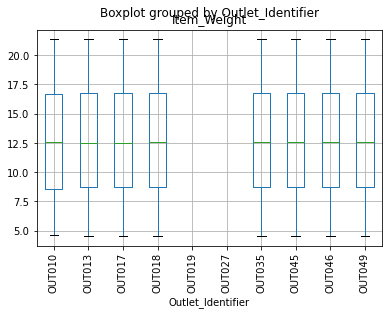

In [11]:
data.boxplot(column='Item_Weight', by='Outlet_Identifier', rot=90)

This graph shows that the missing weight affects two outlets.

In [12]:
# average weight per item
item_av_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')
item_av_weight.head()

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115


In [13]:
# create a mask of the missing data in Item_Weight
null_mask_weight = data['Item_Weight'].isnull()

# impute values
data.loc[null_mask_weight, 'Item_Weight'] = data.loc[null_mask_weight, 'Item_Identifier'].apply(lambda x: item_av_weight.loc[x])


Text(0.5, 1.0, '')

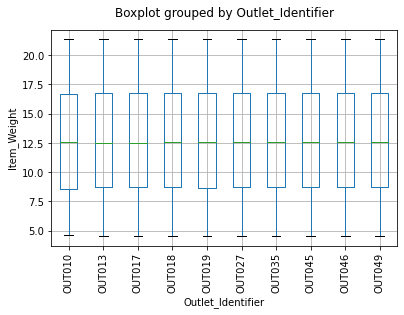

In [14]:
ax = data.boxplot(column='Item_Weight', by='Outlet_Identifier', rot=90)
ax.set_ylabel('Item_Weight')
ax.set_title('')

And now we can see that the values we have chosen to replace the missing weights are reasonable as the boxplot of the affected outlets now follows the same pattern as the others.

### Outlet_Size

It could be reasonable to impute the missing values of Outlet_size by the mode size for each Outlet_Type.

Let's have a look at the mode size for each Outlet_Type.

In [15]:
from scipy.stats import mode

# replace all nan values with 'unknown', because the mode function of stats can not compare a float (NaN) and a string
data['Outlet_Size'] = data['Outlet_Size'].fillna('unknown')

# mode size per Outlet_Type
outlet_type_mode_size = data.pivot_table(values='Outlet_Size', index='Outlet_Type', aggfunc=(lambda x:mode(x).mode[0]))
outlet_type_mode_size

,Outlet_Size
Outlet_Type,
Grocery Store,unknown
Supermarket Type1,Small
Supermarket Type2,Medium
Supermarket Type3,Medium


Grocery stores could be considered to be smaller than the supermarkets, so we could replace the 'unknown' in the pivot table above by 'small', but let's check the the sales in each Outlet_Type to see if we can confirm this.

Text(0.5, 1.0, '')

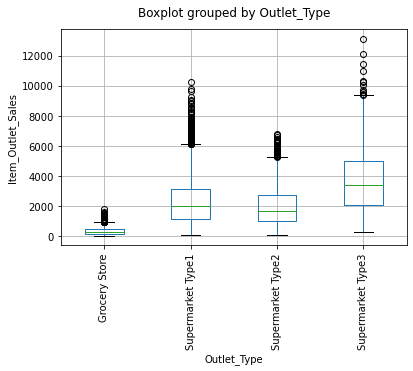

In [16]:
# sales per Outlet_Type
ax = data.boxplot(column='Item_Outlet_Sales', by='Outlet_Type', rot=90)
ax.set_ylabel('Item_Outlet_Sales')
ax.set_title('')

[Text(0, 0, 'Grocery Store'),
 Text(0, 0, 'Supermarket Type1'),
 Text(0, 0, 'Supermarket Type2'),
 Text(0, 0, 'Supermarket Type3')]

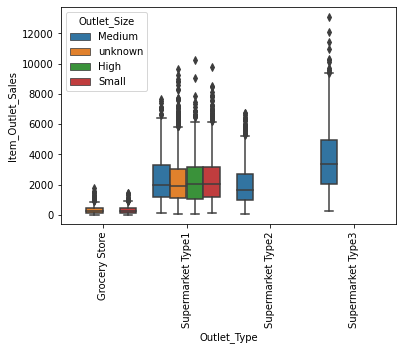

In [17]:
import seaborn as sns
ax = sns.boxplot(data=data, x='Outlet_Type', y='Item_Outlet_Sales', hue='Outlet_Size', order=['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
#ax = data.boxplot(column='Item_Outlet_Sales', by=['Outlet_Type', 'Outlet_Size'], rot=90)
#ax.set_ylabel('Item_Outlet_Sales')
#ax.set_title('')

Grocery stores report far fewer sales than the other Outlet_Types and they have Outlet_Size values that are either 'small' or 'unknown'. Therefore we can reasonably replace the mode value of Grocery Stores with 'small' and impute the missing values of Outlet_Size with the mode value for each Outlet_Type. To check we have done this correctly, we can visualise the Item_Outlet_Sales per Outlet_Identifier.

Note also that Type 2 stores are all medium and Type 3 are also all medium size. Type 1 stores have all sizes, which all have similar sales.

Text(0.5, 1.0, '')

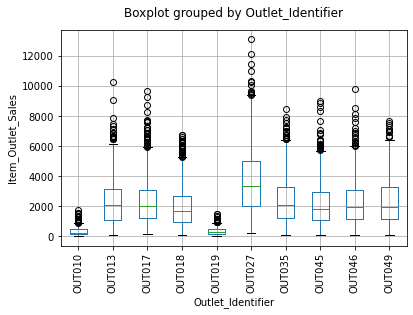

In [18]:
# sales per Outlet_Identifier
ax = data.boxplot(column='Item_Outlet_Sales', by='Outlet_Identifier', rot=90)
ax.set_ylabel('Item_Outlet_Sales')
ax.set_title('')


OUT010 and OUT019 seem to be of size 'small'.

In [19]:
# print Outlet_Type of OUT010 and Out019
outlet_identifier_mode_size = data.pivot_table(values='Outlet_Size', index='Outlet_Identifier', aggfunc=(lambda x:mode(x).mode[0]))
outlet_identifier_mode_size

,Outlet_Size
Outlet_Identifier,
OUT010,unknown
OUT013,High
OUT017,unknown
OUT018,Medium
OUT019,Small
OUT027,Medium
OUT035,Small
OUT045,unknown
OUT046,Small


So OUT010 is unknown; after imputing missing values it should be 'small'.

In [20]:
# replace the Outlet_Size of the Grocery Store in the pivot table with small
outlet_type_mode_size.loc['Grocery Store'] = 'Small'
outlet_type_mode_size

,Outlet_Size
Outlet_Type,
Grocery Store,Small
Supermarket Type1,Small
Supermarket Type2,Medium
Supermarket Type3,Medium


In [21]:
# create a mask of the missing data in Item_Weight
null_mask_size = data['Outlet_Size']=='unknown'

# impute values
data.loc[null_mask_size, 'Outlet_Size'] = data.loc[null_mask_size, 'Outlet_Type'].apply(lambda x: outlet_type_mode_size.loc[x])

# check no missing values
#print(data['Outlet_Size'].head(10))
#print(data.info())


In [22]:
# print Outlet_Type of OUT010 and Out019
outlet_identifier_mode_size = data.pivot_table(values='Outlet_Size', index='Outlet_Identifier', aggfunc=(lambda x:mode(x).mode[0]))
outlet_identifier_mode_size

,Outlet_Size
Outlet_Identifier,
OUT010,Small
OUT013,High
OUT017,Small
OUT018,Medium
OUT019,Small
OUT027,Medium
OUT035,Small
OUT045,Small
OUT046,Small


In [23]:
data.pivot_table(values='Outlet_Type', index='Outlet_Identifier', aggfunc=(lambda x:mode(x).mode[0]))

,Outlet_Type
Outlet_Identifier,
OUT010,Grocery Store
OUT013,Supermarket Type1
OUT017,Supermarket Type1
OUT018,Supermarket Type2
OUT019,Grocery Store
OUT027,Supermarket Type3
OUT035,Supermarket Type1
OUT045,Supermarket Type1
OUT046,Supermarket Type1


It is reasonable that OUT017 and OUT045 are imputed with small because their mode Outlet_Type is Supermarket Type 1 which has mode Outlet_Size small.

### Min value of Item_Visibility

The min value of Item_Visibility is 0, but this can not be as every item must have some visibility.

We want to replace the 0 values for the mean visibility value of that product in each store.

In [24]:
# check how many entries have 0
data['Item_Visibility'].value_counts().head()

0.000000    879
0.076856      3
0.076841      3
0.077290      3
0.077169      3
Name: Item_Visibility, dtype: int64

879 out of 14204 is a lot so we replace the 0 values for NAN values so the mean value is not affected.

In [25]:
# visual check that the 0 values in the firs 10 entries have been replaced
data['Item_Visibility'] = data['Item_Visibility'].replace({0:np.nan})


Check the visibility for each Item_Type in each Outlet_Type.

[Text(0, 0, 'Dairy'),
 Text(0, 0, 'Soft Drinks'),
 Text(0, 0, 'Meat'),
 Text(0, 0, 'Fruits and Vegetables'),
 Text(0, 0, 'Household'),
 Text(0, 0, 'Baking Goods'),
 Text(0, 0, 'Snack Foods'),
 Text(0, 0, 'Frozen Foods'),
 Text(0, 0, 'Breakfast'),
 Text(0, 0, 'Health and Hygiene'),
 Text(0, 0, 'Hard Drinks'),
 Text(0, 0, 'Canned'),
 Text(0, 0, 'Breads'),
 Text(0, 0, 'Starchy Foods'),
 Text(0, 0, 'Others'),
 Text(0, 0, 'Seafood')]

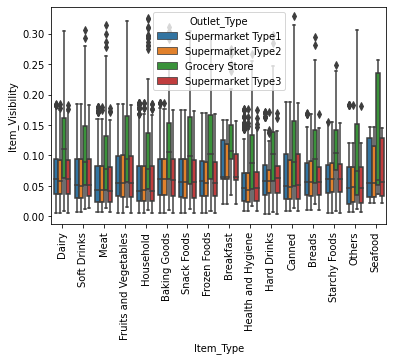

In [26]:
ax = sns.boxplot(data=data, x='Item_Type', y='Item_Visibility', hue='Outlet_Type')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [27]:
data['Item_Visibility'].head(10)

0    0.016047
1    0.019278
2    0.016760
3         NaN
4         NaN
5         NaN
6    0.012741
7    0.127470
8    0.016687
9    0.094450
Name: Item_Visibility, dtype: float64

The Item_Visibility for each Item_Type seems to be very similar for Type 1, 2 and 3 supermarkets and that is lower than for Grocery Sotres; in other words, buying in Grocery Stores is more expensive than in Supermarkets. So we impute missing values for each Item_Type in each Outlet_Type.

In [28]:
# pivot table with the mean values that will be used to replace the nan values
table = data.pivot_table(values='Item_Visibility', index='Item_Type', columns='Outlet_Type', aggfunc='mean')
table

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Type,,,,
Baking Goods,0.116306,0.066692,0.068206,0.066524
Breads,0.111612,0.067579,0.067976,0.066038
Breakfast,0.126056,0.079993,0.083079,0.078609
Canned,0.112484,0.066167,0.064655,0.067549
Dairy,0.120742,0.069299,0.069000,0.069213
Frozen Foods,0.115895,0.065449,0.064184,0.064816
Fruits and Vegetables,0.114820,0.067123,0.067503,0.066758
Hard Drinks,0.109913,0.064873,0.063611,0.065297
Health and Hygiene,0.098924,0.055021,0.053081,0.054924


In [29]:
# replace the nan values
# define function that returns the mean values
def find_mean(x):
    return table.loc[x['Item_Type'], x['Outlet_Type']]

# replace missing values in loan_amount with median values
data['Item_Visibility'].fillna(data[data['Item_Visibility'].isnull()].apply(find_mean, axis=1), inplace=True)


[Text(0, 0, 'Dairy'),
 Text(0, 0, 'Soft Drinks'),
 Text(0, 0, 'Meat'),
 Text(0, 0, 'Fruits and Vegetables'),
 Text(0, 0, 'Household'),
 Text(0, 0, 'Baking Goods'),
 Text(0, 0, 'Snack Foods'),
 Text(0, 0, 'Frozen Foods'),
 Text(0, 0, 'Breakfast'),
 Text(0, 0, 'Health and Hygiene'),
 Text(0, 0, 'Hard Drinks'),
 Text(0, 0, 'Canned'),
 Text(0, 0, 'Breads'),
 Text(0, 0, 'Starchy Foods'),
 Text(0, 0, 'Others'),
 Text(0, 0, 'Seafood')]

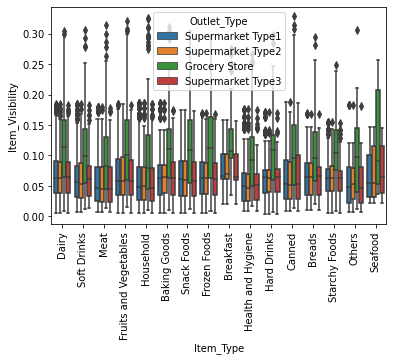

In [30]:
ax = sns.boxplot(data=data, x='Item_Type', y='Item_Visibility', hue='Outlet_Type')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [31]:
data['Item_Visibility'].head(10)

0    0.016047
1    0.019278
2    0.016760
3    0.114820
4    0.057774
5    0.068206
6    0.012741
7    0.127470
8    0.016687
9    0.094450
Name: Item_Visibility, dtype: float64

### Combine Low Fat, low fat and LF to Low Fat and reg and Regular to Regular

In [32]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF': 'Low Fat', 
                                                             'low fat': 'Low Fat', 
                                                             'reg': 'Regular'})
data['Item_Fat_Content'].head(5)

0    Low Fat
1    Regular
2    Low Fat
3    Regular
4    Low Fat
Name: Item_Fat_Content, dtype: object

In [33]:
print('\nFrequency of Categories for variable Item_Fat_Content')
print(data['Item_Fat_Content'].value_counts())


Frequency of Categories for variable Item_Fat_Content
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


## Feature Engineering

### Convert the Outlet_Establishment_Years into how old the establishments are

In [35]:
data['Outlet_Age'] = 2021 - data['Outlet_Establishment_Year']
data['Outlet_Age'].head(5)

0    22
1    12
2    22
3    23
4    34
Name: Outlet_Age, dtype: int64

In [36]:
data['Outlet_Age'].describe()

count    14204.000000
mean        23.169319
std          8.371664
min         12.000000
25%         17.000000
50%         22.000000
75%         34.000000
max         36.000000
Name: Outlet_Age, dtype: float64

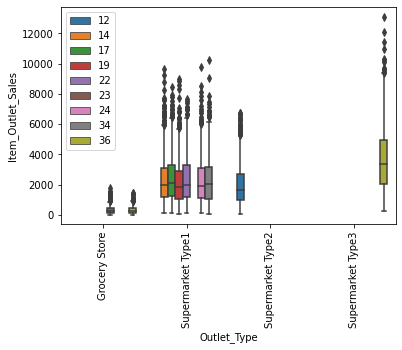

In [37]:
ax = sns.boxplot(data=data, x='Outlet_Type', y='Item_Outlet_Sales', hue='Outlet_Age', order=['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
leg = ax.legend()
ax.legend(loc='upper left')

Supermarket type 3 is the oldest, having been stablished 28 years ago. Type 1 have been build at different times, Type 2 is the newest. Grocery stores are relaviely old.

### Create broader category for type of item

Notice the Item_Identifiers all start with letters. Let's see what they are and what they mean.

In [38]:
data['Item_Type_Category'] = data['Item_Identifier'].astype(str).str[:3]
data['Item_Type_Category'].unique()

array(['FDA', 'DRC', 'FDN', 'FDX', 'NCD', 'FDP', 'FDO', 'FDH', 'FDU',
       'FDY', 'FDS', 'FDF', 'NCB', 'DRI', 'FDW', 'FDC', 'FDR', 'FDV',
       'DRJ', 'FDE', 'NCS', 'DRH', 'NCX', 'DRZ', 'FDB', 'FDK', 'FDL',
       'FDM', 'NCP', 'NCL', 'DRK', 'FDI', 'FDZ', 'NCI', 'FDJ', 'FDG',
       'NCZ', 'FDQ', 'FDD', 'DRG', 'NCR', 'FDT', 'DRB', 'DRE', 'DRA',
       'NCF', 'NCH', 'NCO', 'NCN', 'NCC', 'DRD', 'DRF', 'DRL', 'NCM',
       'NCU', 'DRY', 'NCW', 'DRM', 'NCT', 'NCQ', 'DRP', 'DRQ', 'NCK',
       'NCY', 'DRN', 'NCA', 'NCE', 'NCJ', 'NCV', 'NCG', 'DRO'],
      dtype=object)

These seem to stand for Food, Drink and Non-Consumable. So rename them to be more intuitive.

In [39]:
data['Item_Type_Category'] = data['Item_Identifier'].astype(str).str[:2]
data['Item_Type_Category'].unique()

array(['FD', 'DR', 'NC'], dtype=object)

In [40]:
data['Item_Type_Category'] = data['Item_Type_Category'].map({'FD': 'Food', 'DR':'Drink', 'NC':'Non-Consumable'})


In [41]:
data['Item_Type_Category'].value_counts()

Food              10201
Non-Consumable     2686
Drink              1317
Name: Item_Type_Category, dtype: int64

### Change value of the 'Item_Fat_Content' of the items that  are non-consumables.

Non-consumables do not have a fat content.

In [42]:
data.loc[data['Item_Type_Category']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

### Make a new category for items that reflect their sales - very high, high, medium, low.

Recall that there are more Item_RMP than Item_Identifier, indicating that different stores have different Item_MRP. We can visualise the Item_RMP grouped by the Item_Type and Outlet_Type

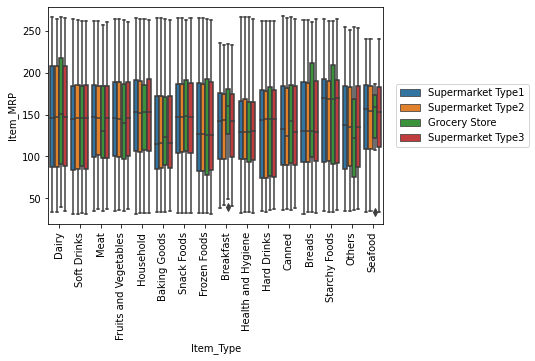

In [43]:
ax = sns.boxplot(data=data, x='Item_Type', y='Item_MRP', hue='Outlet_Type')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
leg = ax.legend()
ax.legend(loc='center right', bbox_to_anchor=(1.45, 0.5))

All the Item_Types seems to have a similar average Item_MRP accross the Outlet_Types. So we do not need to consider different Item_MRP per Outlet_Type.

Now we can have a look at the distribution of all Item_MRP.

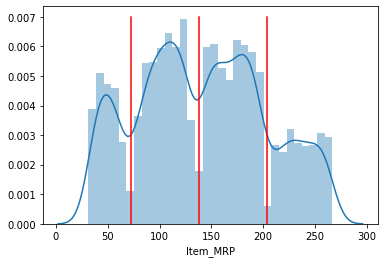

In [44]:
ax = sns.distplot(data['Item_MRP'])
x1=72
x2=138
x3=204
ax.plot([x1, x1],[0, 0.007], color='r')
ax.plot([x2, x2],[0, 0.007],color='r')
ax.plot([x3, x3],[0, 0.007],color='r')
plt.show()

The Item_MRP clearly shows there are 4 different price categories. So we define them to be 'Low', 'Medium', 'High', 'Very High'.

In [45]:
def price_cat(x):
    if x <= x1:
        return 'Low'
    elif (x > x1) & (x <= x2):
        return 'Medium'
    elif (x > x2) & (x <= x3):
        return 'High'
    else:
        return 'Very High'

data['Item_MRP_Category'] = data['Item_MRP']
data['Item_MRP_Category'] = data['Item_MRP_Category'].apply(price_cat)
data['Item_MRP_Category'].value_counts()

High         4934
Medium       4659
Very High    2400
Low          2211
Name: Item_MRP_Category, dtype: int64

## Analysis

### Numerical data

In [46]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Age
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000,14204.000000
mean,12.793380,0.070270,141.004977,1997.830681,2181.288914,23.169319
std,4.651716,0.048750,62.086938,8.371664,1706.499616,8.371664
min,4.555000,0.003575,31.290000,1985.000000,33.290000,12.000000
25%,8.710000,0.033143,94.012000,1987.000000,834.247400,17.000000
50%,12.600000,0.060322,142.247000,1999.000000,1794.331000,22.000000
75%,16.750000,0.095967,185.855600,2004.000000,3101.296400,34.000000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,36.000000


#### Item_MRP

As we have seen previously, the Item_MRP is clearly divided into 4 categories. Now, let's plot the Item_MRP grouped by the Outlet_Type and Outle_Size.

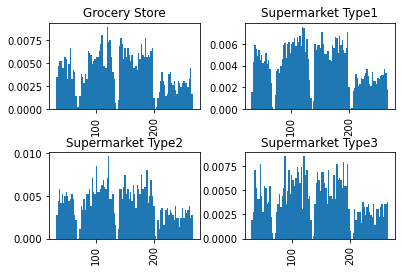

In [47]:
ax = data.hist(column='Item_MRP' , by='Outlet_Type', bins=100, density=True)

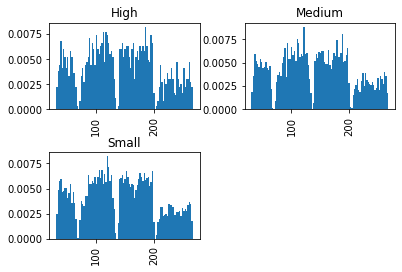

In [48]:
ax = data.hist(column='Item_MRP' , by='Outlet_Size', bins=100, density=True)

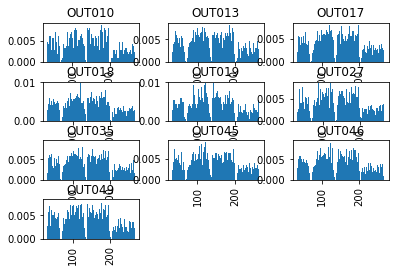

In [49]:
ax = data.hist(column='Item_MRP' , by='Outlet_Identifier', bins=100, density=True)

So the different categories of Item_MRP are well represented accross all outlets.

Explore how Item_MRP depends on Outlet_Type:

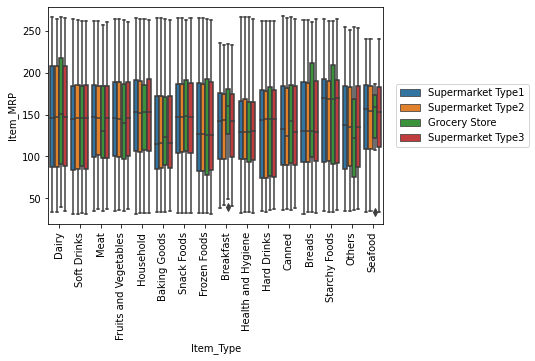

In [50]:
ax = sns.boxplot(data=data, x='Item_Type', y='Item_MRP', hue='Outlet_Type')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
leg = ax.legend()
ax.legend(loc='center right', bbox_to_anchor=(1.45, 0.5))

No handles with labels found to put in legend.
No handles with labels found to put in legend.


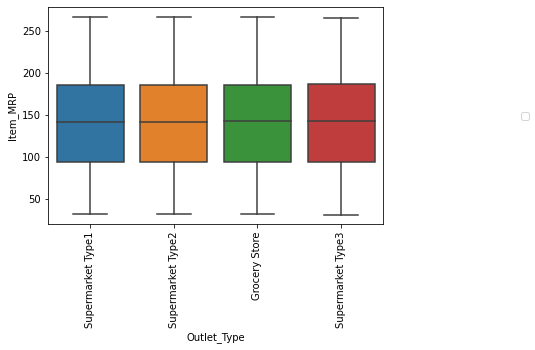

In [51]:
ax = sns.boxplot(data=data, x='Outlet_Type', y='Item_MRP')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
leg = ax.legend()
ax.legend(loc='center right', bbox_to_anchor=(1.45, 0.5))

Item_MRP does not differ depending on Outlet_Type.

#### Item_Outlet_Sales


No handles with labels found to put in legend.
No handles with labels found to put in legend.


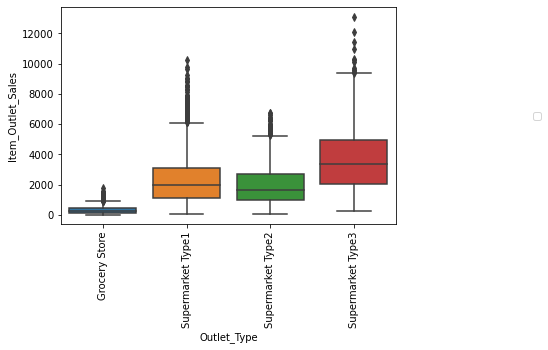

In [52]:
ax = sns.boxplot(data=data, x='Outlet_Type', y='Item_Outlet_Sales', order=['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
leg = ax.legend()
ax.legend(loc='center right', bbox_to_anchor=(1.45, 0.5))

Item_Outlet_Sales are very low for Grocery Stores, even though we saw above the Item_MRP is the same for all Outlet_Types.

Let's Explore if this is because of the Outlet_Size. 

[Text(0, 0, 'Grocery Store'),
 Text(0, 0, 'Supermarket Type1'),
 Text(0, 0, 'Supermarket Type2'),
 Text(0, 0, 'Supermarket Type3')]

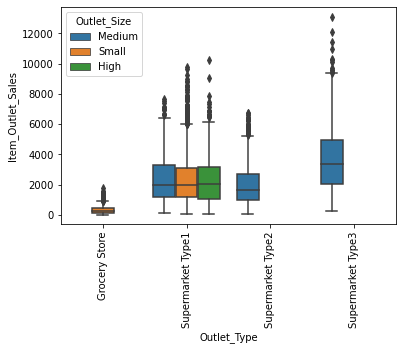

In [53]:
# Item_Outlet_Sales per Outlet_Type and Outlet_Size
ax = sns.boxplot(data=data, x='Outlet_Type', y='Item_Outlet_Sales', hue='Outlet_Size', order=['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


No, it is just about the Grocery Stores. Let's explore how they Item_Types differ depending on Outlet_Type.

[Text(0, 0, 'Dairy'),
 Text(0, 0, 'Soft Drinks'),
 Text(0, 0, 'Meat'),
 Text(0, 0, 'Fruits and Vegetables'),
 Text(0, 0, 'Household'),
 Text(0, 0, 'Baking Goods'),
 Text(0, 0, 'Snack Foods'),
 Text(0, 0, 'Frozen Foods'),
 Text(0, 0, 'Breakfast'),
 Text(0, 0, 'Health and Hygiene'),
 Text(0, 0, 'Hard Drinks'),
 Text(0, 0, 'Canned'),
 Text(0, 0, 'Breads'),
 Text(0, 0, 'Starchy Foods'),
 Text(0, 0, 'Others'),
 Text(0, 0, 'Seafood')]

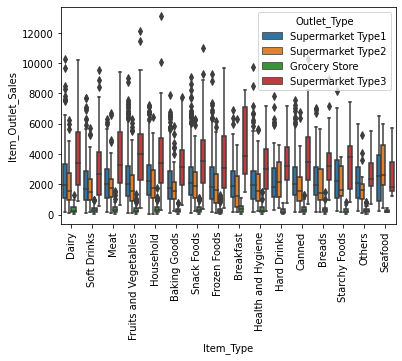

In [54]:
ax = sns.boxplot(data=data, x='Item_Type', y='Item_Outlet_Sales', hue='Outlet_Type')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


Grocery stores just sell a smaller number of everything.

[Text(0, 0, 'Grocery Store'),
 Text(0, 0, 'Supermarket Type1'),
 Text(0, 0, 'Supermarket Type2'),
 Text(0, 0, 'Supermarket Type3')]

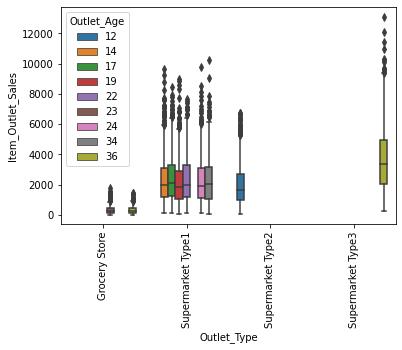

In [55]:
# Item_Outlet_Sales per Outlet_Type and Outlet_Age
ax = sns.boxplot(data=data, x='Outlet_Type', y='Item_Outlet_Sales', hue='Outlet_Age', order=['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


Interestingly, type 3 supermarkets perform the best in pure sales (Item_Outlet_Sales), even though they are the oldest and they are also medium sized.

Now let's explore how each store (Outlet_Identifier) performs in sales:

[Text(0, 0, 'OUT049'),
 Text(0, 0, 'OUT018'),
 Text(0, 0, 'OUT010'),
 Text(0, 0, 'OUT013'),
 Text(0, 0, 'OUT027'),
 Text(0, 0, 'OUT045'),
 Text(0, 0, 'OUT017'),
 Text(0, 0, 'OUT046'),
 Text(0, 0, 'OUT035'),
 Text(0, 0, 'OUT019')]

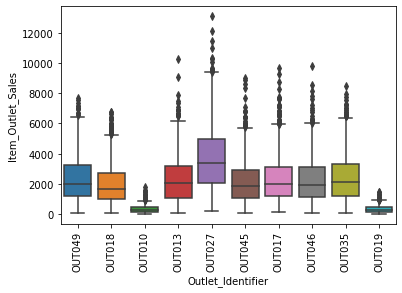

In [56]:
# Item_Outlet_Sales per Outlet_Identifier
ax = sns.boxplot(data=data, x='Outlet_Identifier', y='Item_Outlet_Sales')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


In [57]:
for i in data['Outlet_Identifier'].unique():
    otype = data[data['Outlet_Identifier']==i]['Outlet_Type'].unique()
    osize = data[data['Outlet_Identifier']==i]['Outlet_Size'].unique()
    print('Outlet_Identifier: {}, Outlet_Type(s): {}, Outlet_Size: {}'.format(i, otype, osize))


Outlet_Identifier: OUT049, Outlet_Type(s): ['Supermarket Type1'], Outlet_Size: ['Medium']
Outlet_Identifier: OUT018, Outlet_Type(s): ['Supermarket Type2'], Outlet_Size: ['Medium']
Outlet_Identifier: OUT010, Outlet_Type(s): ['Grocery Store'], Outlet_Size: ['Small']
Outlet_Identifier: OUT013, Outlet_Type(s): ['Supermarket Type1'], Outlet_Size: ['High']
Outlet_Identifier: OUT027, Outlet_Type(s): ['Supermarket Type3'], Outlet_Size: ['Medium']
Outlet_Identifier: OUT045, Outlet_Type(s): ['Supermarket Type1'], Outlet_Size: ['Small']
Outlet_Identifier: OUT017, Outlet_Type(s): ['Supermarket Type1'], Outlet_Size: ['Small']
Outlet_Identifier: OUT046, Outlet_Type(s): ['Supermarket Type1'], Outlet_Size: ['Small']
Outlet_Identifier: OUT035, Outlet_Type(s): ['Supermarket Type1'], Outlet_Size: ['Small']
Outlet_Identifier: OUT019, Outlet_Type(s): ['Grocery Store'], Outlet_Size: ['Small']


Again, this confirms that low sales is due to the outlet being a grocery store and not because the size is small.

#### Item_Number_Sales

Given that the Item_MRP does not change significantly accross the stores, it might be more useful to analyse the number of items sold, not the Item_Outlet_Sales. The Item_Outlet_Sales is the number of items sold times the Item_MRP. So let's make a new variable with the number of items sold (by dividing the Item_Outlet_Sales by Item_MRP).


In [58]:
data['Item_Number_Sales'] = data['Item_Outlet_Sales']/data['Item_MRP']

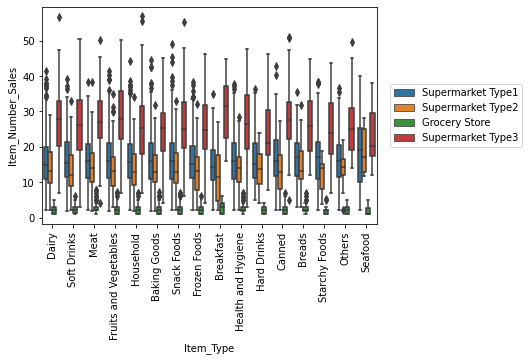

In [59]:
ax = sns.boxplot(data=data, x='Item_Type', y='Item_Number_Sales', hue='Outlet_Type')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
leg = ax.legend()
ax.legend(loc='center right', bbox_to_anchor=(1.45, 0.5))

No handles with labels found to put in legend.
No handles with labels found to put in legend.


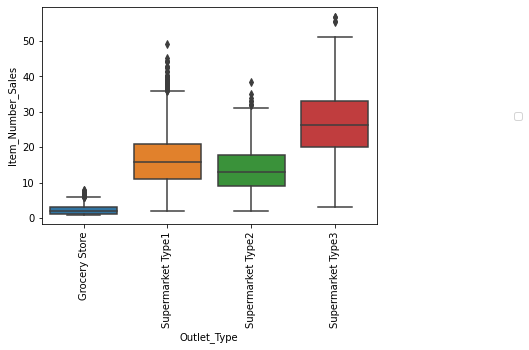

In [60]:

ax = sns.boxplot(data=data, x='Outlet_Type', y='Item_Number_Sales', order=['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
leg = ax.legend()
ax.legend(loc='center right', bbox_to_anchor=(1.45, 0.5))


[Text(0, 0, 'Grocery Store'),
 Text(0, 0, 'Supermarket Type1'),
 Text(0, 0, 'Supermarket Type2'),
 Text(0, 0, 'Supermarket Type3')]

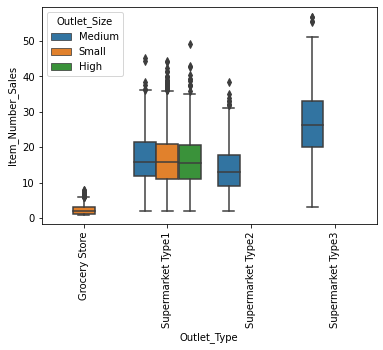

In [61]:

# Item_Outlet_Sales per Outlet_Type and Outlet_Size
ax = sns.boxplot(data=data, x='Outlet_Type', y='Item_Number_Sales', hue='Outlet_Size', order=['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


[Text(0, 0, 'OUT049'),
 Text(0, 0, 'OUT018'),
 Text(0, 0, 'OUT010'),
 Text(0, 0, 'OUT013'),
 Text(0, 0, 'OUT027'),
 Text(0, 0, 'OUT045'),
 Text(0, 0, 'OUT017'),
 Text(0, 0, 'OUT046'),
 Text(0, 0, 'OUT035'),
 Text(0, 0, 'OUT019')]

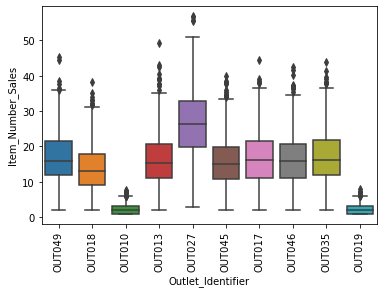

In [62]:
# Item_Outlet_Sales per Outlet_Identifier
ax = sns.boxplot(data=data, x='Outlet_Identifier', y='Item_Number_Sales')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

So it is clear that in pure numbers Grocery Stores sell less.

#### Item_outlet_sales and Item_MRP vs Item_Visibility

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


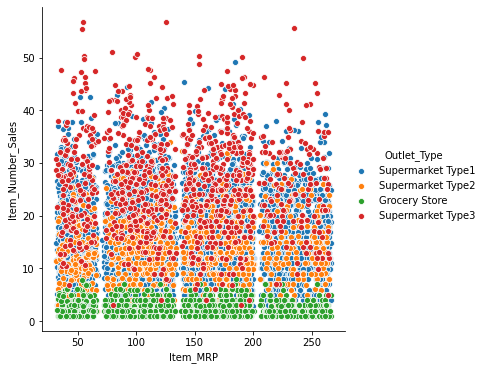

In [63]:
sns.pairplot(data=data, x_vars='Item_MRP', y_vars='Item_Number_Sales', hue='Outlet_Type', size=5)

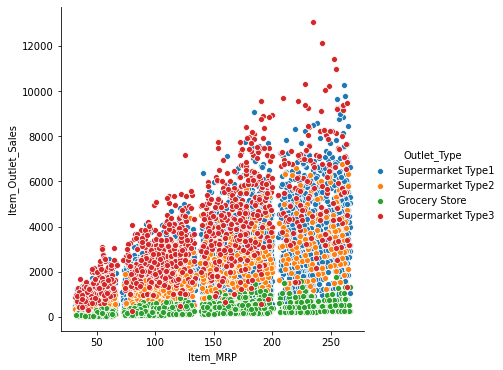

In [64]:
sns.pairplot(data=data, x_vars='Item_MRP', y_vars='Item_Outlet_Sales', hue='Outlet_Type', size=5)

In [65]:
cor1 = data['Item_MRP'].corr(data['Item_Outlet_Sales'])
cor2 = data['Item_MRP'].corr(data['Item_Number_Sales'])
print('Correlation between Item_MRP and Item_Outlet_Sales: {}'.format(cor1))
print('Correlation between Item_MRP and Item_Number_Sales: {}'.format(cor2))

Correlation between Item_MRP and Item_Outlet_Sales: 0.5675744466569193
Correlation between Item_MRP and Item_Number_Sales: 0.01114352701232483


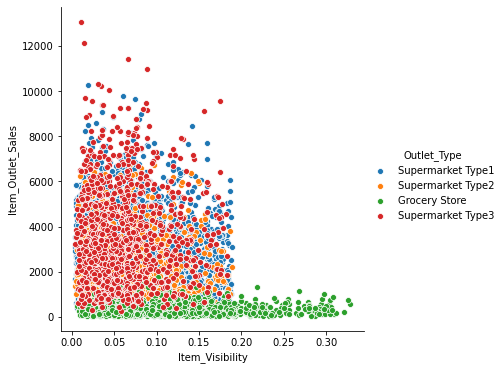

In [66]:
sns.pairplot(data=data, x_vars='Item_Visibility', y_vars='Item_Outlet_Sales', hue='Outlet_Type', size=5)

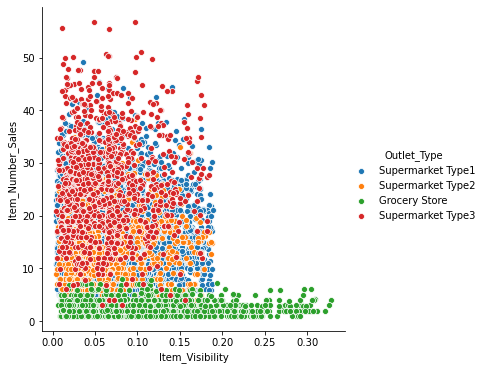

In [67]:
sns.pairplot(data=data, x_vars='Item_Visibility', y_vars='Item_Number_Sales', hue='Outlet_Type', size=5)

In [68]:
cor1 = data['Item_Visibility'].corr(data['Item_Outlet_Sales'])
cor2 = data['Item_Visibility'].corr(data['Item_Number_Sales'])
print('Correlation between Item_Visibility and Item_Outlet_Sales: {}'.format(cor1))
print('Correlation between Item_Visibility and Item_Number_Sales: {}'.format(cor2))

Correlation between Item_Visibility and Item_Outlet_Sales: -0.14076174687662235
Correlation between Item_Visibility and Item_Number_Sales: -0.17440844918045084


There is a positive correlation between Item_MRP and Item_Outlet_Sales and a negative correlation between Item_Outlet_Sales and visibility.

There is no correlation Item_MRP and Item_Number_Sales and there is a negative correlation between Item_Number_Sales and visibility.

Questions that arrise:
1. Why do Gorcery Stores have items with Item_Visibility at heights that do not appear at other outlet_types?

### Analysis of Categorical Data

In [69]:
# check out the frequecy of each different category in each nomical value

# filter the categorical variables
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']

# exclude the id and source columns
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier', 'source']]

# print the frequency of categories
for col in categorical_columns:
    print('\nFrequency of Categories for variable %s'%(col))
    print(data[col].value_counts())




Frequency of Categories for variable Item_Fat_Content
Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for variable Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of Categories for variable Outlet_Identifier
OUT027    1559
OUT013    1553
OUT049    1550
OUT035    1550
OUT046    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

Frequency of Categories for variable Outlet_Size

## Numerical and One-Hot Coding of Categorical Variables

Some of the models we will use require only numerical data.

In [70]:
data.to_csv('./data.csv', index=False)

In [71]:
# drop the Outlet_Establishment_Year and Item_Number_Sales columns from the data
data = data.drop(['Outlet_Establishment_Year','Item_Number_Sales'], axis=1)
data.dtypes

Item_Identifier          object
Item_Weight             float64
Item_Fat_Content         object
Item_Visibility         float64
Item_Type                object
Item_MRP                float64
Outlet_Identifier        object
Outlet_Size              object
Outlet_Location_Type     object
Outlet_Type              object
Item_Outlet_Sales       float64
source                   object
Outlet_Age                int64
Item_Type_Category       object
Item_MRP_Category        object
dtype: object

In [72]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales', 'source',
       'Outlet_Age', 'Item_Type_Category', 'Item_MRP_Category'],
      dtype='object')

In [73]:
from copy import deepcopy
data_copy = deepcopy(data)

### Numerical Coding of Categorical Data

In [74]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# create variables to keep the information of the Outlet_Identifiers
data_copy['Outlet'] = le.fit_transform(data_copy['Outlet_Identifier'])

# convert all categories of nominal variables into numeric types
var_mod = ['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type',
           'Outlet_Size', 'Outlet_Type', 'Item_Type_Category', 
           'Item_MRP_Category', 'Outlet']

le = LabelEncoder()

for i in var_mod:
    data_copy[i] = le.fit_transform(data_copy[i])

In [76]:
data_copy.to_csv('./data_copy.csv', index=False)

In [77]:
data_copy2 = deepcopy(data_copy)

### Once-hot coding of categorical variables

In [78]:
# one-hot coding:  creating dummy variables, one for each category of a categorical variable 
data_copy2 = pd.get_dummies(data_copy2, columns=['Item_Fat_Content', 'Item_Type', 
                                     'Outlet_Location_Type',
                                     'Outlet_Size', 'Outlet_Type', 
                                     'Item_Type_Category', 
                                     'Item_MRP_Category', 'Outlet'])

In [80]:
data_copy2.to_csv('./data_copy2.csv', index=False)

In [81]:
data_copy2.dtypes

Item_Identifier            object
Item_Weight               float64
Item_Visibility           float64
Item_MRP                  float64
Outlet_Identifier          object
Item_Outlet_Sales         float64
source                     object
Outlet_Age                  int64
Item_Fat_Content_0          uint8
Item_Fat_Content_1          uint8
Item_Fat_Content_2          uint8
Item_Type_0                 uint8
Item_Type_1                 uint8
Item_Type_2                 uint8
Item_Type_3                 uint8
Item_Type_4                 uint8
Item_Type_5                 uint8
Item_Type_6                 uint8
Item_Type_7                 uint8
Item_Type_8                 uint8
Item_Type_9                 uint8
Item_Type_10                uint8
Item_Type_11                uint8
Item_Type_12                uint8
Item_Type_13                uint8
Item_Type_14                uint8
Item_Type_15                uint8
Outlet_Location_Type_0      uint8
Outlet_Location_Type_1      uint8
Outlet_Locatio

In [82]:
data_copy2.columns.shape

(54,)

In [83]:
data_copy.dtypes

Item_Identifier          object
Item_Weight             float64
Item_Fat_Content          int32
Item_Visibility         float64
Item_Type                 int32
Item_MRP                float64
Outlet_Identifier        object
Outlet_Size               int32
Outlet_Location_Type      int32
Outlet_Type               int32
Item_Outlet_Sales       float64
source                   object
Outlet_Age                int64
Item_Type_Category        int32
Item_MRP_Category         int32
Outlet                    int64
dtype: object

In [84]:
data.dtypes

Item_Identifier          object
Item_Weight             float64
Item_Fat_Content         object
Item_Visibility         float64
Item_Type                object
Item_MRP                float64
Outlet_Identifier        object
Outlet_Size              object
Outlet_Location_Type     object
Outlet_Type              object
Item_Outlet_Sales       float64
source                   object
Outlet_Age                int64
Item_Type_Category       object
Item_MRP_Category        object
dtype: object

One-hot encoding of the factor variables leaves us with 56 predictors.

## Standardisation of numerical data

In [85]:
data_copy3 = deepcopy(data_copy2)

In [86]:
data_copy3.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,source,Outlet_Age,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,249.8092,OUT049,3735.1380,train,22,1,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,48.2692,OUT018,443.4228,train,12,0,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,141.6180,OUT049,2097.2700,train,22,1,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.114820,182.0950,OUT010,732.3800,train,23,0,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.057774,53.8614,OUT013,994.7052,train,34,0,1,...,0,1,0,0,0,0,0,0,0,0


In [87]:
data_copy3.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Type_0,Item_Type_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
count,14204.000000,14204.000000,14204.000000,8523.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,...,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.793380,0.070270,141.004977,2181.288914,23.169319,0.457547,0.189102,0.353351,0.076457,0.029288,...,0.065123,0.109335,0.108631,0.108843,0.061954,0.109758,0.109124,0.108983,0.109124,0.109124
std,4.651716,0.048750,62.086938,1706.499616,8.371664,0.498212,0.391603,0.478027,0.265738,0.168617,...,0.246751,0.312071,0.311187,0.311453,0.241081,0.312599,0.311806,0.311629,0.311806,0.311806
min,4.555000,0.003575,31.290000,33.290000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.710000,0.033143,94.012000,834.247400,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.600000,0.060322,142.247000,1794.331000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.750000,0.095967,185.855600,3101.296400,34.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,21.350000,0.328391,266.888400,13086.964800,36.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [88]:
from sklearn import preprocessing

# standardisation of numerical data
X = data_copy3[['Item_Visibility', 'Item_Weight', 'Outlet_Age']]
standardized_X = preprocessing.scale(X.values, with_mean=True)
data_copy3[['Item_Visibility', 'Item_Weight', 'Outlet_Age']] = standardized_X


In [90]:
data_copy3.to_csv('./data_copy3.csv', index=False)

In [91]:
data_copy3.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,source,Outlet_Age,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,-0.751014,-1.112295,249.8092,OUT049,3735.1380,train,-0.139681,1,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,-1.477653,-1.046017,48.2692,OUT018,443.4228,train,-1.334228,0,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,1.011839,-1.097673,141.6180,OUT049,2097.2700,train,-0.139681,1,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,1.377308,0.913882,182.0950,OUT010,732.3800,train,-0.020226,0,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,-0.830557,-0.256345,53.8614,OUT013,994.7052,train,1.293777,0,1,...,0,1,0,0,0,0,0,0,0,0


In [92]:
data_copy3.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Type_0,Item_Type_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
count,1.420400e+04,1.420400e+04,14204.000000,8523.000000,1.420400e+04,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,...,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,6.247545e-17,3.885468e-17,141.004977,2181.288914,6.924825e-17,0.457547,0.189102,0.353351,0.076457,0.029288,...,0.065123,0.109335,0.108631,0.108843,0.061954,0.109758,0.109124,0.108983,0.109124,0.109124
std,1.000035e+00,1.000035e+00,62.086938,1706.499616,1.000035e+00,0.498212,0.391603,0.478027,0.265738,0.168617,...,0.246751,0.312071,0.311187,0.311453,0.241081,0.312599,0.311806,0.311629,0.311806,0.311806
min,-1.771104e+00,-1.368151e+00,31.290000,33.290000,-1.334228e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.778533e-01,-7.615942e-01,94.012000,834.247400,-7.369545e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-4.157330e-02,-2.040582e-01,142.247000,1794.331000,-1.396807e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.506020e-01,5.271343e-01,185.855600,3101.296400,1.293777e+00,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.839519e+00,5.294947e+00,266.888400,13086.964800,1.532686e+00,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Separate train and test datasets and export data

The variables named 'train' and 'test' are the data with numerical and one-hot coding of categorical variables. The variables 'train_num_cat' and 'test_num_cat' are the data with only numerical coding of categorical varuables. The variables 'otrain' and 'otest' (o is for original) are the data without coding. 

In [161]:
# divide into train and test
train_s = data_copy3.loc[data_copy3['source']=='train']
test_s = data_copy3.loc[data_copy3['source']=='test']

# drop unnecessary columns
train_s.drop(['source'], axis=1, inplace=True)
test_s.drop(['Item_Outlet_Sales', 'source'], axis=1, inplace=True)

# export to files
train_s.to_csv('./train_s.csv', index=False)
test_s.to_csv('./test_s.csv', index=False)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [162]:
# divide into train and test
train = data_copy2.loc[data_copy2['source']=='train']
test = data_copy2.loc[data_copy2['source']=='test']

# drop unnecessary columns
train.drop(['source'], axis=1, inplace=True)
test.drop(['Item_Outlet_Sales', 'source'], axis=1, inplace=True)

# export to files
#train.to_csv('/Users/shusasaki/Documents/github/data_science_projects_editing/MartSales/modified_data/train.csv', index=False)
#test.to_csv('/Users/shusasaki/Documents/github/data_science_projects_editing/MartSales/modified_data/test.csv', index=False)

In [163]:
# divide into train and test
train_num_cat = data_copy.loc[data_copy['source']=='train']
test_num_cat = data_copy.loc[data_copy['source']=='test']

# drop unnecessary columns
train_num_cat.drop(['source'], axis=1, inplace=True)
test_num_cat.drop(['Item_Outlet_Sales', 'source'], axis=1, inplace=True)

# export to files
#train_num_cat.to_csv('/Users/shusasaki/Documents/github/data_science_projects_editing/MartSales/modified_data/train_num_cat.csv', index=False)
#test_num_cat.to_csv('/Users/shusasaki/Documents/github/data_science_projects_editing/MartSales/modified_data/test_num_cat.csv', index=False)

In [164]:
# divide into train and test
otrain = data.loc[data['source']=='train']
otest = data.loc[data['source']=='test']

# drop unnecessary columns
otrain.drop(['source'], axis=1, inplace=True)
otest.drop(['Item_Outlet_Sales', 'source'], axis=1, inplace=True)

# export to files
#otrain.to_csv('/Users/shusasaki/Documents/github/data_science_projects_editing/MartSales/modified_data/otrain.csv', index=False)
#otest.to_csv('/Users/shusasaki/Documents/github/data_science_projects_editing/MartSales/modified_data/otest.csv', index=False)

# Model Building

## Now we divide the training data into training and test sets
... and we perform cross validation on the training data.

In [165]:
from sklearn.model_selection import train_test_split

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(train_s.loc[:, train_s.columns != 'Item_Outlet_Sales'], train_s['Item_Outlet_Sales'], test_size=0.2, random_state=42)
X_train_s = X_train_s.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)
X_test_s = X_test_s.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)
print(X_train_s.shape, y_train_s.shape)
print(X_test_s.shape, y_test_s.shape)

(6818, 50) (6818,)
(1705, 50) (1705,)


In [166]:
X_train, X_test, y_train, y_test = train_test_split(train.loc[:, train.columns != 'Item_Outlet_Sales'], train['Item_Outlet_Sales'], test_size=0.2, random_state=42)
X_train = X_train.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)
X_test = X_test.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6818, 50) (6818,)
(1705, 50) (1705,)


In [167]:
X_train_num_cat, X_test_num_cat, y_train_num_cat, y_test_num_cat = train_test_split(train_num_cat.loc[:, train_num_cat.columns != 'Item_Outlet_Sales'], train_num_cat['Item_Outlet_Sales'], test_size=0.2, random_state=42)
X_train_num_cat = X_train_num_cat.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)
X_test_num_cat = X_test_num_cat.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)
print(X_train_num_cat.shape, y_train_num_cat.shape)
print(X_test_num_cat.shape, y_test_num_cat.shape)

(6818, 12) (6818,)
(1705, 12) (1705,)


## Baseline models

Define all predicted sales to be the average sales.

### Average sales

In [168]:
# train the model and evaluate it with the RMSE
mean_sales = y_train_num_cat.mean()
X_test_num_cat['pred'] = mean_sales

from sklearn.metrics import mean_squared_error
print('RMSE: %.4g' %np.sqrt(mean_squared_error(y_test_num_cat.values, X_test_num_cat['pred'].values)))


RMSE: 1652


Text(0, 0.5, 'Predictions')

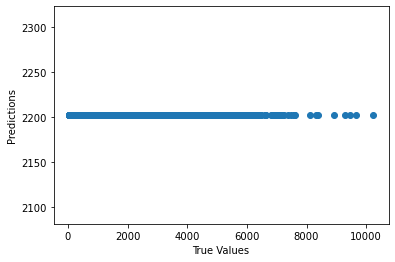

In [169]:
plt.scatter(y_test_num_cat, X_test_num_cat['pred'])
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [170]:
# define dataframe for submission
model1 = test_num_cat[['Item_Identifier', 'Outlet_Identifier']]
model1['Item_Outlet_Sales'] = mean_sales

# export submission file
#model1.to_csv('/Users/shusasaki/Documents/data_science_projects/datasets/MartSales data/final_models/model1.csv', index=False)

model1.head(10)

<ipython-input-170-198d78564aff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model1['Item_Outlet_Sales'] = mean_sales


,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
8523,FDW58,OUT049,2202.365231
8524,FDW14,OUT017,2202.365231
8525,NCN55,OUT010,2202.365231
8526,FDQ58,OUT017,2202.365231
8527,FDY38,OUT027,2202.365231
8528,FDH56,OUT046,2202.365231
8529,FDL48,OUT018,2202.365231
8530,FDC48,OUT027,2202.365231
8531,FDN33,OUT045,2202.365231
8532,FDA36,OUT017,2202.365231


In [171]:
# reinitialise the data
X_train_num_cat, X_test_num_cat, y_train_num_cat, y_test_num_cat = train_test_split(train_num_cat.loc[:, train_num_cat.columns != 'Item_Outlet_Sales'], train_num_cat['Item_Outlet_Sales'], test_size=0.2, random_state=42)

### Average Sales by Item_Type_Category

In [172]:
# pivot table with values Item_Outlet_Sales and index Item_Type_Category
X_train_num_cat['Item_Outlet_Sales'] = y_train_num_cat
item_category_sales_table = X_train_num_cat.pivot_table(values='Item_Outlet_Sales', index='Item_Type_Category')
item_category_sales_table


,Item_Outlet_Sales
Item_Type_Category,
0,2022.430537
1,2237.307754
2,2159.187339


In [173]:
# define function that returns the mean values
def find_sales_means(x):
    return item_category_sales_table.loc[x]

RMSE: 1651


Text(0, 0.5, 'Predictions')

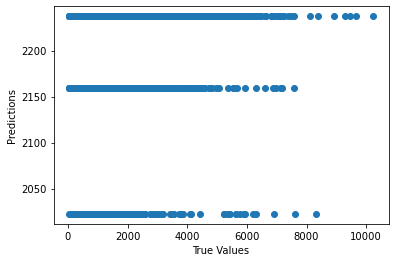

In [174]:
# evaluate model
X_test_num_cat['pred'] = X_test_num_cat['Item_Type_Category'].apply(find_sales_means)
print('RMSE: %.4g' %np.sqrt(mean_squared_error(y_test_num_cat.values, X_test_num_cat['pred'].values)))

plt.scatter(y_test_num_cat, X_test_num_cat['pred'])
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [175]:
# define submision model
model2 = test_num_cat[['Item_Identifier', 'Outlet_Identifier', 'Item_Type_Category']]
model2['Item_Outlet_Sales'] = model2['Item_Type_Category'].apply(find_sales_means)
model2 = model2.drop('Item_Type_Category', axis=1)

# export submission file
#model2.to_csv('/Users/shusasaki/Documents/data_science_projects/datasets/MartSales data/final_models/model2.csv', index=False)

model2.head(10)

<ipython-input-175-b28afdbd16c5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model2['Item_Outlet_Sales'] = model2['Item_Type_Category'].apply(find_sales_means)


,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
8523,FDW58,OUT049,2237.307754
8524,FDW14,OUT017,2237.307754
8525,NCN55,OUT010,2159.187339
8526,FDQ58,OUT017,2237.307754
8527,FDY38,OUT027,2237.307754
8528,FDH56,OUT046,2237.307754
8529,FDL48,OUT018,2237.307754
8530,FDC48,OUT027,2237.307754
8531,FDN33,OUT045,2237.307754
8532,FDA36,OUT017,2237.307754


In [176]:
# reinitialise the data
X_train_num_cat, X_test_num_cat, y_train_num_cat, y_test_num_cat = train_test_split(train_num_cat.loc[:, train_num_cat.columns != 'Item_Outlet_Sales'], train_num_cat['Item_Outlet_Sales'], test_size=0.2, random_state=42)

### Average Sales by Product_Type_Category in Particular Outlet_Type

In [109]:
# pivot table with values Item_Outlet_Sales and index Item_Type_Category and Outlet_Category
X_train_num_cat['Item_Outlet_Sales'] = y_train_num_cat
item_outlet_sales_table = X_train_num_cat.pivot_table(values='Item_Outlet_Sales', 
                                            index='Item_Type_Category', 
                                            columns='Outlet_Type')
item_outlet_sales_table

Outlet_Type,0,1,2,3
Item_Type_Category,,,,
0,308.407437,2148.264504,1915.547572,3340.198538
1,344.858118,2361.702345,2061.157693,3767.855604
2,361.037616,2337.223838,2012.974133,3477.177489


In [110]:
# define function that returns the mean values
def find_sales_means(x):
    return item_outlet_sales_table.loc[x['Item_Type_Category'], x['Outlet_Type']]

RMSE: 1417


Text(0, 0.5, 'Predictions')

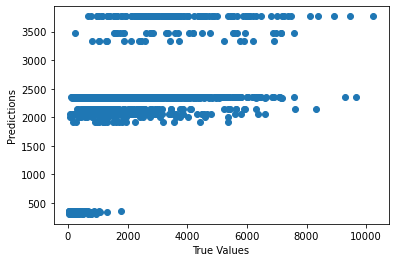

In [111]:
# eval model
# evaluate model
X_test_num_cat['pred'] = X_test_num_cat.apply(find_sales_means, axis=1)
print('RMSE: %.4g' %np.sqrt(mean_squared_error(y_test_num_cat.values, X_test_num_cat['pred'].values)))

plt.scatter(y_test_num_cat, X_test_num_cat['pred'])
plt.xlabel('True Values')
plt.ylabel('Predictions')


In [112]:
# define submission file
model3 = test_num_cat[['Item_Identifier', 'Outlet_Identifier', 
               'Item_Type_Category', 'Outlet_Type']]

model3['Item_Outlet_Sales'] = model3.apply(find_sales_means, axis=1)
model3 = model3.drop(['Item_Type_Category', 'Outlet_Type'], axis=1)

# export submission file
#model3.to_csv('/Users/shusasaki/Documents/data_science_projects/datasets/MartSales data/final_models/model3.csv', index=False)

model3.head(10)

<ipython-input-112-d521c9d5b139>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model3['Item_Outlet_Sales'] = model3.apply(find_sales_means, axis=1)


,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
8523,FDW58,OUT049,2361.702345
8524,FDW14,OUT017,2361.702345
8525,NCN55,OUT010,361.037616
8526,FDQ58,OUT017,2361.702345
8527,FDY38,OUT027,3767.855604
8528,FDH56,OUT046,2361.702345
8529,FDL48,OUT018,2061.157693
8530,FDC48,OUT027,3767.855604
8531,FDN33,OUT045,2361.702345
8532,FDA36,OUT017,2361.702345


In [113]:
# reinitialise the data
X_train_num_cat, X_test_num_cat, y_train_num_cat, y_test_num_cat = train_test_split(train_num_cat.loc[:, train_num_cat.columns != 'Item_Outlet_Sales'], train_num_cat['Item_Outlet_Sales'], test_size=0.2, random_state=42)

## Choose the most relevant features

Let's have a look at the relative importance of the predictors in building models. We do that with Recursive Feature Elimination (rfe) from the sklearn package with different models. One-hot encoding of the factor variables leaves us with 56 predictors, of which only the first 13 or so should suffice to build a predictive model while avoiding over-fitting.

### Feature selection with Recursive Feature Elimination and a DecisionTreeRegressor

In [114]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFECV

estimator = DecisionTreeRegressor(max_depth=10, min_samples_leaf=100)
selector = RFECV(estimator=estimator, cv=5)
selector = selector.fit(X_train, y_train)


Feature Ranking:
 Outlet_Location_Type_1    47
Outlet_9                  46
Outlet_8                  45
Outlet_7                  44
Item_Type_15              43
Outlet_6                  42
Item_Type_14              41
Item_Type_11              40
Outlet_5                  39
Outlet_4                  38
Item_Type_13              37
Outlet_3                  36
Item_Type_12              35
Outlet_2                  34
Item_Type_10              33
Outlet_1                  32
Item_Type_9               31
Outlet_0                  30
Item_Type_8               29
Item_MRP_Category_3       28
Item_Type_7               27
Item_MRP_Category_2       26
Item_Type_6               25
Item_MRP_Category_1       24
Item_Type_5               23
Item_Type_2               22
Item_Type_1               21
Item_Type_3               20
Item_Type_Category_1      19
Item_Type_Category_0      18
Outlet_Type_2             17
Item_MRP_Category_0       16
Item_Type_4               15
Item_Type_Category_2     

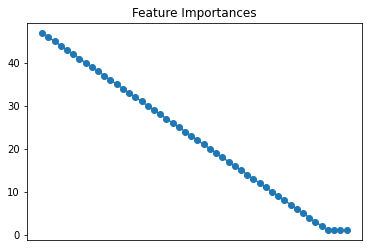

In [115]:
# visualise result
coefs = pd.Series(selector.ranking_, X_train.columns).sort_values(ascending=False)
ax=coefs.plot(title='Feature Importances', marker='o', rot=90)
ax.axes.get_xaxis().set_visible(False)
print("Feature Ranking:\n %s"% coefs)


### Feature selection with Recursive Feature Elimination and a RandomForestRegressor

In [116]:
from sklearn.ensemble import RandomForestRegressor

estimator = RandomForestRegressor(n_estimators=16, random_state=0)
selector = RFECV(estimator=estimator, cv=5)
selector = selector.fit(X_train, y_train)

Feature Ranking:
 Outlet_0                  2
Outlet_9                  1
Item_Type_4               1
Item_Type_14              1
Item_Type_13              1
Item_Type_12              1
Item_Type_11              1
Item_Type_10              1
Item_Type_9               1
Item_Type_8               1
Item_Type_7               1
Item_Type_6               1
Item_Type_5               1
Item_Type_3               1
Outlet_Location_Type_0    1
Item_Type_2               1
Item_Type_1               1
Item_Type_0               1
Item_Fat_Content_2        1
Item_Fat_Content_1        1
Item_Fat_Content_0        1
Outlet_Age                1
Item_MRP                  1
Item_Visibility           1
Item_Type_15              1
Outlet_Location_Type_1    1
Outlet_8                  1
Outlet_Location_Type_2    1
Outlet_7                  1
Outlet_6                  1
Outlet_5                  1
Outlet_4                  1
Outlet_3                  1
Outlet_2                  1
Outlet_1                  1
It

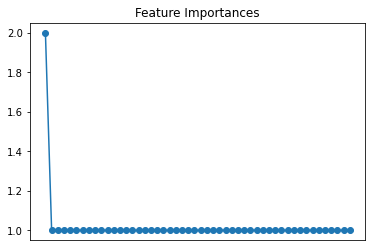

In [117]:
# visualise result
coefs = pd.Series(selector.ranking_, X_train.columns).sort_values(ascending=False)
ax=coefs.plot(title='Feature Importances', marker='o', rot=90)
ax.axes.get_xaxis().set_visible(False)
print("Feature Ranking:\n %s"% coefs)

From the analysis done, it makes sense that the features chosen include (in no particualr order):

Item_Visibility            

Outlet_Age                 

Item_MRP_Category_3        

Outlet_Type_3              

Outlet_Type_0              

Item_MRP    

Both of these methods choose the same most important features. Hot-coding of the categorical variables leaves a total of 55 features (numerical and categorical). So we will work with the top 15.

In [118]:
features = list(coefs.index[:16])
not_features = list(coefs.index[16:])


In [119]:
with open('./features.txt', 'w') as f:
    for item in features:
        f.write("%s\n" % item)

In [121]:
with open('./not_features.txt', 'w') as f:
    for item in not_features:
        f.write("%s\n" % item)

In [122]:
X_train = X_train.drop(not_features, axis=1)


In [123]:
X_test = X_test.drop(not_features, axis=1)

In [124]:
test = test.drop(not_features, axis=1)

Note: Feature scaling is done better without data standardisation - see 'Big Mart Sales prediction_v3.ipynb'.

## Regression models

Here we create a generic function that takes the algorithm and data as input, makes the model, performs corss-validation and generates the submission files.

In [125]:
# define target and ID columns
target = 'Item_Outlet_Sales'
IDcols = ['Item_Identifier', 'Outlet_Identifier']

from sklearn.model_selection import cross_val_score
from sklearn import metrics

def modelfit(model, X_train, X_test, y_train, y_test, dtest, IDcols, target, filename):
    
    # fit algorithm to data
    model.fit(X_train, y_train)
    
    # predict training set
#    train_preds = model.predict(X_train)
    val_preds = model.predict(X_test)
    
    # perform cross-validation
    cv_score = cross_val_score(model, X_train, y_train, cv=20, scoring='neg_mean_squared_error')
#    print(cv_score)
    cv_score = np.sqrt(np.abs(cv_score))
#    print(cv_score)
    
    # print model report
    print('\nModel Report')
#    print('Training dataset RMSE: %.4g' %np.sqrt(metrics.mean_squared_error(train_preds, y_train)))
    print('Validation dataset RMSE: %.4g' %np.sqrt(metrics.mean_squared_error(val_preds, y_test)))
    print('CV score: Mean and 95%% confidence interval  - %.4g (+/- %0.2f)| Std - %.4g | Min - %.4g | Max - %.4g' % (np.mean(cv_score),np.std(cv_score) * 2,np.std(cv_score),np.min(cv_score),np.max(cv_score)))
#    print("Accuracy: %0.2f (+/- %0.2f)" % (np.mean(cv_score), np.std(cv_score) * 2))
    
    # predictors
#    predictors = [x for x in dtest.columns if x not in [target]+IDcol]
    
    # prediction on testing data
    dtest[target] = model.predict(dtest[X_train.columns])
    
    # export submission file
    IDcols.append(target)
    submission = pd.DataFrame({x:dtest[x] for x in IDcols})
    #submission.to_csv(filename, index=False)


### Standard Regression Model

In [126]:
test.head()

,Item_Identifier,Outlet_Identifier,Item_Type_2,Item_Type_3,Item_Type_4,Item_Type_5,Item_Type_6,Item_Type_7,Item_Type_8,Item_Type_9,Item_Type_10,Item_Type_11,Item_Type_12,Item_Type_13,Item_Type_14,Outlet_Location_Type_0,Outlet_0,Outlet_9
8523,FDW58,OUT049,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
8524,FDW14,OUT017,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8525,NCN55,OUT010,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
8526,FDQ58,OUT017,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8527,FDY38,OUT027,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0



Model Report
Validation dataset RMSE: 1544
CV score: Mean and 95% confidence interval  - 1613 (+/- 131.32)| Std - 65.66 | Min - 1470 | Max - 1702


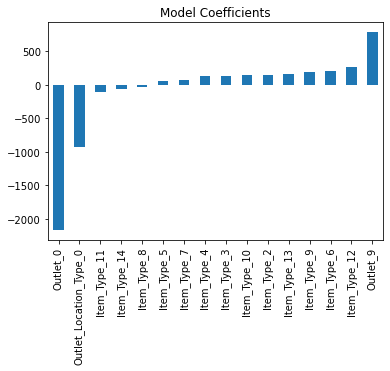

In [127]:
from sklearn.linear_model import LinearRegression

filename = './model4.csv'
model4 = LinearRegression(normalize=True)
modelfit(model4, X_train, X_test, y_train, y_test, test, IDcols, target, filename)

# visualise result
coef4 = pd.Series(model4.coef_, X_train.columns).sort_values()
coef4.plot(kind='bar', title='Model Coefficients')

By comparing the RMSE we can see that this model is better than the baseline model3. However, the coefficients are very large, which signifies overfitting. So we will next use a ridge regression model to regularise the magnitude of the coefficients of he features.

### Ridge Regression Model


Model Report
Validation dataset RMSE: 1544
CV score: Mean and 95% confidence interval  - 1613 (+/- 131.65)| Std - 65.82 | Min - 1470 | Max - 1702


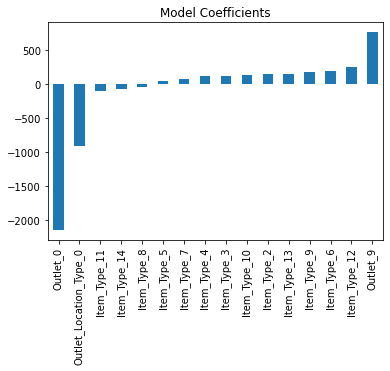

In [128]:
from sklearn.linear_model import Ridge

#predictors = [x for x in train_num_cat_one_hot.columns if x not in [target]+IDcols]
filename = './final_models/model5.csv'
model5 = Ridge(alpha=0.01, normalize=True)
modelfit(model5, X_train, X_test, y_train, y_test, test, IDcols, target, filename)


# visualise result
coef5 = pd.Series(model5.coef_, X_train.columns).sort_values()
coef5.plot(kind='bar', title='Model Coefficients')

The RMSE is only slightly better than with model4 and the CV scores are not very different. 

Next, we not only regularize the magnitude of the coefficients but we also do feature selection, with Lasso Regression.

### Lasso Regression Model


Model Report
Validation dataset RMSE: 1544
CV score: Mean and 95% confidence interval  - 1613 (+/- 131.62)| Std - 65.81 | Min - 1469 | Max - 1702


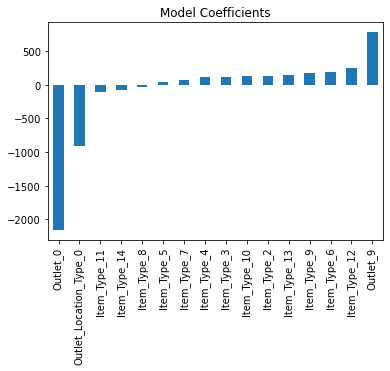

In [129]:
from sklearn.linear_model import Lasso

filename = './final_models/model6.csv'
model6 = Lasso(alpha=0.01, normalize=True)
modelfit(model6, X_train, X_test, y_train, y_test, test, IDcols, target, filename)

# visualise result
coef6 = pd.Series(model6.coef_, X_train.columns).sort_values()
coef6.plot(kind='bar', title='Model Coefficients')

Again, the RMSE is only slightly better than with model4 and model5 and the CV scores are not very different. 

Next, we not only regularize the magnitude of the coefficients but we also do feature selection, with Lasso Regression.

Now we try to tune the alpha parameter for both Ridge and Lasso Regression to see if we get improvement.

### Alpha parameter tuning for Ridge and Lasso Regression

In [130]:
# function to run Ridge or Lasso Regressionwith difference values of alpha
def ridge_lasso_regression(alg, X_train, y_train, X_test, y_test, alpha):
    
    # define model
    if alg == 'Ridge':
        model = Ridge(alpha=alpha,normalize=True)
    else:
        model = Lasso(alpha=alpha,normalize=True, max_iter=1e2)
    
    # fit algorithm to data
    model.fit(X_train, y_train)
    
    # predict training set
    #train_predictions = model.predict(X_train)
    val_predictions = model.predict(X_test)
    
    # print the RSME 
    print('\nModel Report for alpha={}'.format(alpha))
    #print('Training dataset RMSE: %.4g' %np.sqrt(metrics.mean_squared_error(y_train, train_predictions)))
    print('Validation dataset RMSE: %.4g' %np.sqrt(metrics.mean_squared_error(y_test, val_predictions)))
    RMSE=np.sqrt(metrics.mean_squared_error(y_test, val_predictions))

    # print cross validation
    cv_score = cross_val_score(model, X_train, y_train, cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    print('CV score: Mean and 95%% confidence interval  - %.4g (+/- %0.2f)| Std - %.4g | Min - %.4g | Max - %.4g' % (np.mean(cv_score),np.std(cv_score) * 2,np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    # visualise
    fig = plt.figure()
    coef = pd.Series(model.coef_, X_train.columns).sort_values()
    coef.plot(kind='bar', title='Model Coefficients with alpha {} and RSME: {}'.format(alpha, RMSE))
    


Model Report for alpha=1e-15
Validation dataset RMSE: 1544
CV score: Mean and 95% confidence interval  - 1613 (+/- 131.32)| Std - 65.66 | Min - 1470 | Max - 1702

Model Report for alpha=1e-10
Validation dataset RMSE: 1544
CV score: Mean and 95% confidence interval  - 1613 (+/- 131.32)| Std - 65.66 | Min - 1470 | Max - 1702

Model Report for alpha=1e-08
Validation dataset RMSE: 1544
CV score: Mean and 95% confidence interval  - 1613 (+/- 131.32)| Std - 65.66 | Min - 1470 | Max - 1702

Model Report for alpha=0.0001
Validation dataset RMSE: 1544
CV score: Mean and 95% confidence interval  - 1613 (+/- 131.33)| Std - 65.66 | Min - 1470 | Max - 1702

Model Report for alpha=0.001
Validation dataset RMSE: 1544
CV score: Mean and 95% confidence interval  - 1613 (+/- 131.36)| Std - 65.68 | Min - 1470 | Max - 1702

Model Report for alpha=0.01
Validation dataset RMSE: 1544
CV score: Mean and 95% confidence interval  - 1613 (+/- 131.65)| Std - 65.82 | Min - 1470 | Max - 1702

Model Report for alph

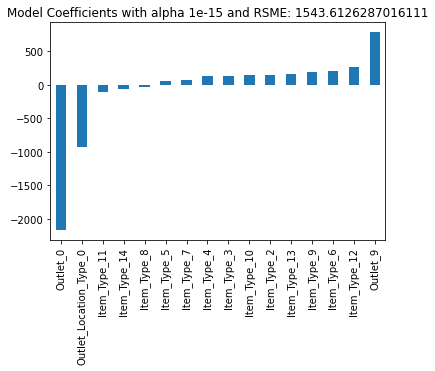

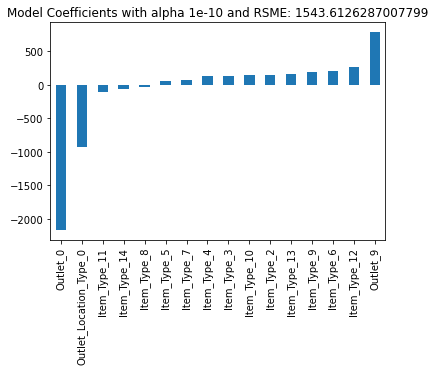

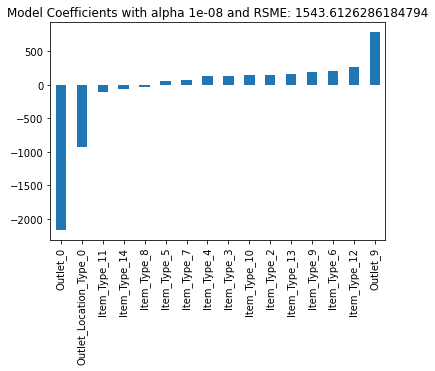

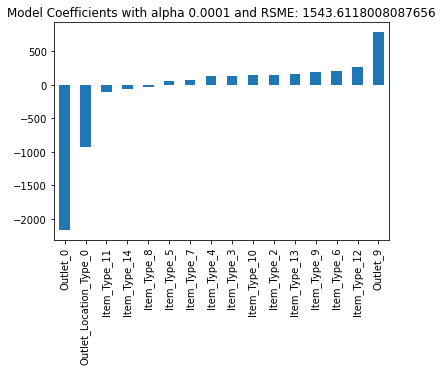

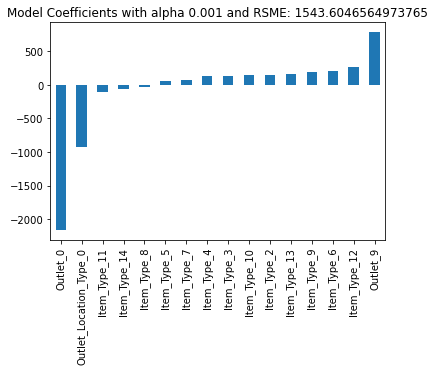

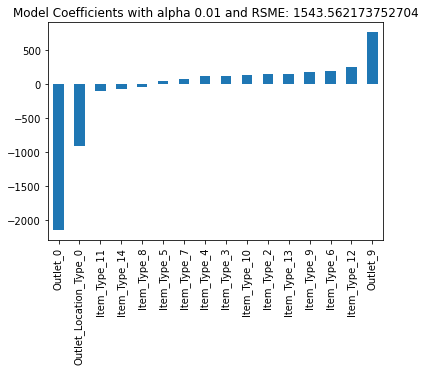

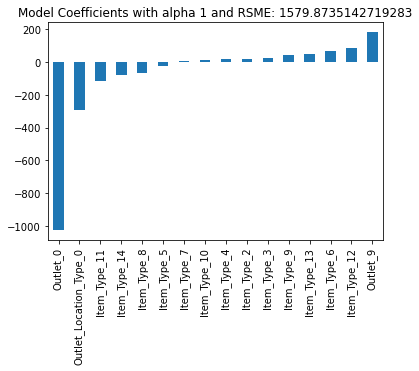

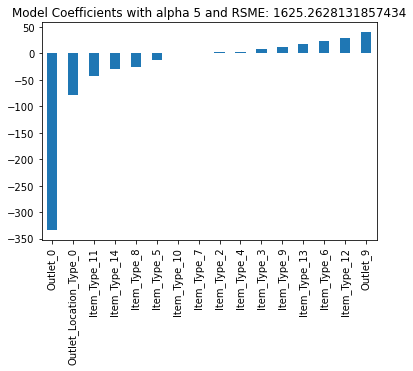

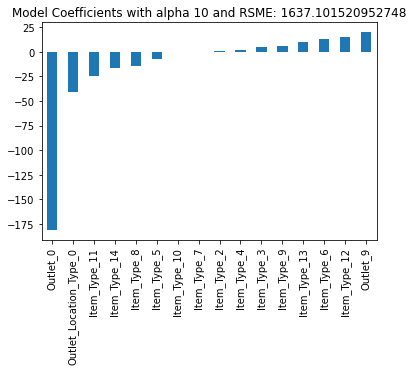

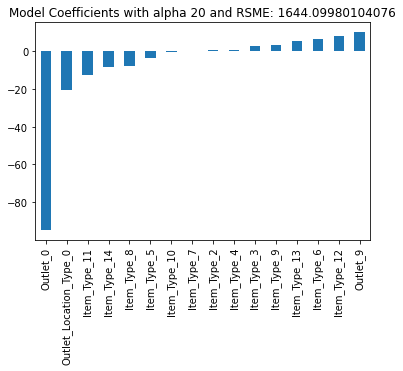

In [131]:
# set the different values of alpha to be tested
alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]

# run models
for i in range(10):
    ridge_lasso_regression('Ridge', X_train, y_train, X_test, y_test, alpha[i])

    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8534783599.277948, tolerance: 2016798.6508341576
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8207341406.941969, tolerance: 1925313.4155202312
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8105621970.182475, tolerance: 1903756.1390408722
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWar


Model Report for alpha=1e-15
Validation dataset RMSE: 1544


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8064287937.2448015, tolerance: 1917315.8363954255
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8063270079.581275, tolerance: 1915822.991475137
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8184421128.907594, tolerance: 1924140.0436252481
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWar

CV score: Mean and 95% confidence interval  - 1613 (+/- 131.32)| Std - 65.66 | Min - 1470 | Max - 1702

Model Report for alpha=1e-10
Validation dataset RMSE: 1544
CV score: Mean and 95% confidence interval  - 1613 (+/- 131.32)| Std - 65.66 | Min - 1470 | Max - 1702

Model Report for alpha=1e-08
Validation dataset RMSE: 1544
CV score: Mean and 95% confidence interval  - 1613 (+/- 131.32)| Std - 65.66 | Min - 1470 | Max - 1702

Model Report for alpha=0.0001
Validation dataset RMSE: 1544
CV score: Mean and 95% confidence interval  - 1613 (+/- 131.33)| Std - 65.66 | Min - 1470 | Max - 1702

Model Report for alpha=0.001
Validation dataset RMSE: 1544
CV score: Mean and 95% confidence interval  - 1613 (+/- 131.35)| Std - 65.68 | Min - 1470 | Max - 1702

Model Report for alpha=0.01
Validation dataset RMSE: 1544
CV score: Mean and 95% confidence interval  - 1613 (+/- 131.62)| Std - 65.81 | Min - 1469 | Max - 1702

Model Report for alpha=1
Validation dataset RMSE: 1559
CV score: Mean and 95% con

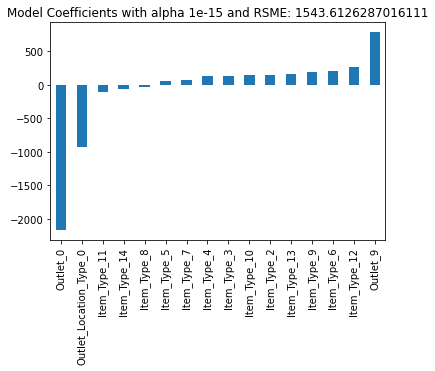

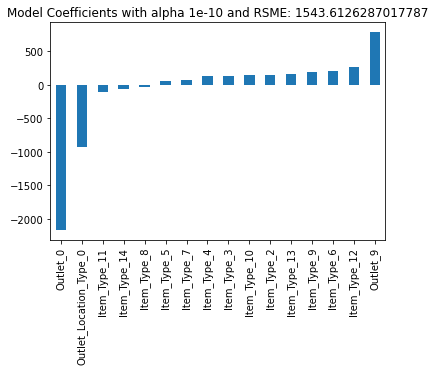

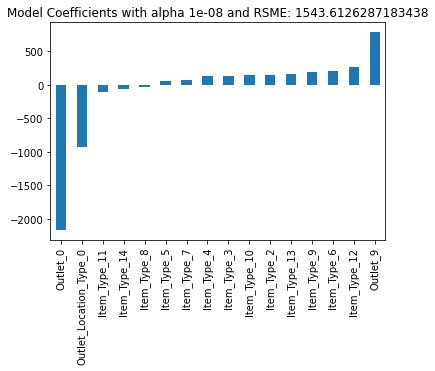

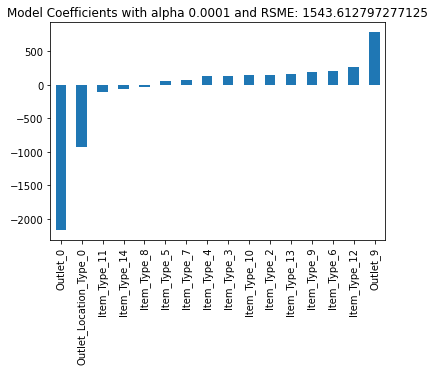

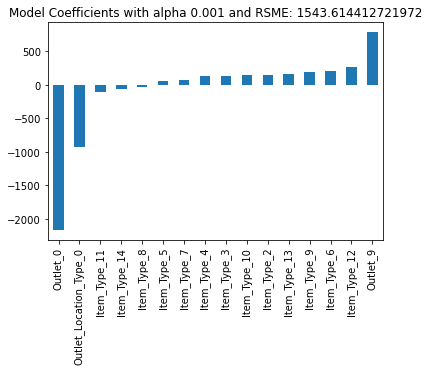

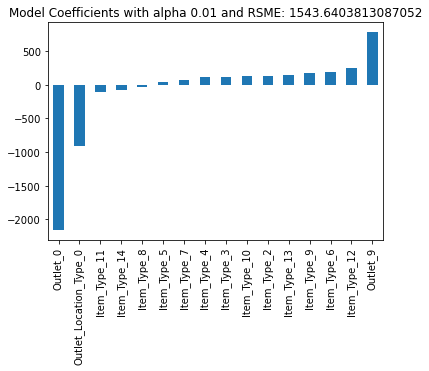

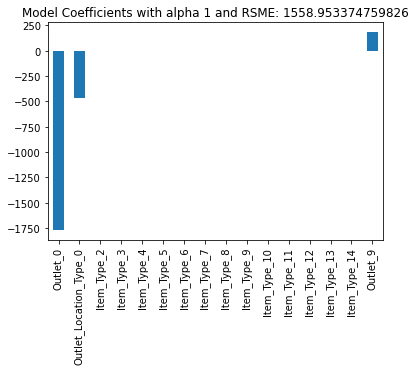

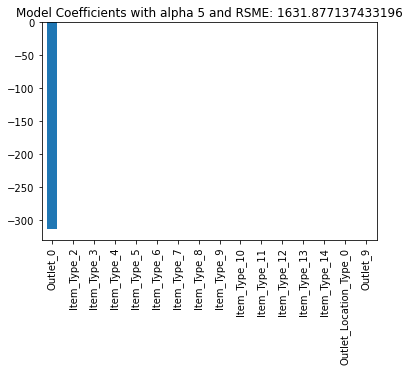

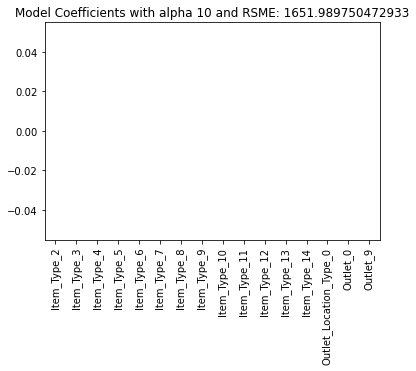

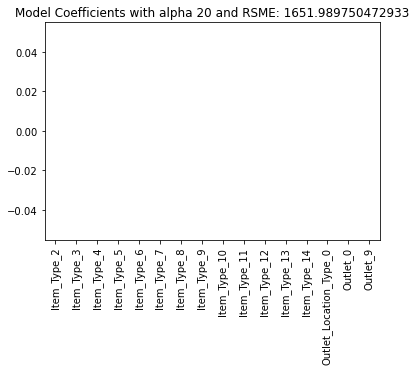

In [133]:
for i in range(10):
    ridge_lasso_regression('Lasso', X_train, y_train, X_test, y_test, alpha[i])
    

We stick with 0.001.

Now we can explore other types of models; such as decision Trees, Random Forests, GBM, XGBoost and ensemble techniques.

## Tree models

Here we build a decision tree model and we use an ensemble method - Random Forest.


### Decision Tree Model


Model Report
Validation dataset RMSE: 1545
CV score: Mean and 95% confidence interval  - 1613 (+/- 128.93)| Std - 64.46 | Min - 1471 | Max - 1703


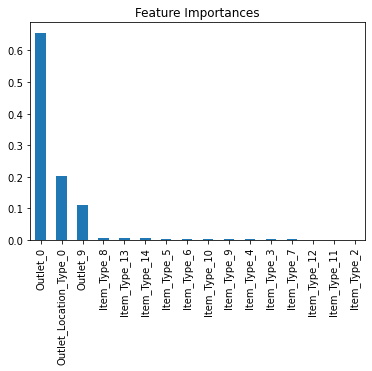

In [135]:
# initial guess
from sklearn.tree import DecisionTreeRegressor

filename = '/Users/shusasaki/Documents/data_science_projects/datasets/MartSales data/final_models/v2/model7.csv'
model7 = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(model7, X_train, X_test, y_train, y_test, test, IDcols, target, filename)

# visualise result
coef7 = pd.Series(model7.feature_importances_, X_train.columns).sort_values(ascending=False)
coef7.plot(kind='bar', title='Feature Importances')


### Parameter tuning for DecisionTreeRegressor

In [136]:
# function for parameter tunning
def decision_tree_regression_tune(model, X_train, y_train, X_test, y_test):
    
    # fit algorithm to data
    model.fit(X_train, y_train)
    
    # predict     
    test_pred = model.predict(X_test)
    
    # RSME 
    #print('Training dataset RMSE: %.4g' %np.sqrt(metrics.mean_squared_error(y_train, train_predictions)))
    #print('Validation dataset RMSE: %.4g' %np.sqrt(metrics.mean_squared_error(y_test, val_predictions)))
    RMSE=np.sqrt(metrics.mean_squared_error(y_test, test_pred))

    # cross validation
    cv_score = cross_val_score(model, X_train, y_train, cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    #print('CV score: Mean and 95%% confidence interval  - %.4g (+/- %0.2f)| Std - %.4g | Min - %.4g | Max - %.4g' % (np.mean(cv_score),np.std(cv_score) * 2,np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    cv_mean = np.mean(cv_score)
        
    return (RMSE, cv_mean)

To begin with, check all possible values for the parameters max_depth, min_samples_split and min_samples_leafs.

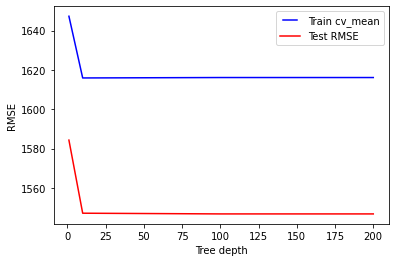

In [137]:
max_depths=[1, 10, 1e2, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
'''
max_depths=[1, 1e2, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
min_samples_leafs = np.linspace(0.1, 0.5, 10, endpoint=True)
'''
train_results = []
test_results = []

for max_depth in max_depths:
    
    # define model
    model = DecisionTreeRegressor(max_depth=max_depth)
    
    rmse, cvmean = decision_tree_regression_tune(model, X_train, y_train, X_test, y_test)
    train_results.append(cvmean)
    test_results.append(rmse)
    

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train cv_mean')
line2, = plt.plot(max_depths, test_results, 'r', label='Test RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMSE')
plt.xlabel('Tree depth')
plt.show()
            

In the next part of the analysis, let's choose values between 1 and 30.

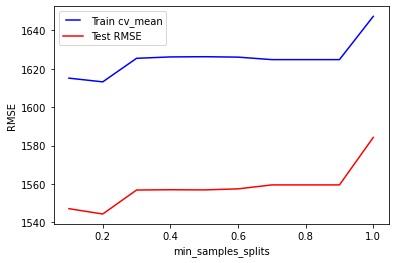

In [138]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
'''
max_depths=[1, 1e2, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
min_samples_leafs = np.linspace(0.1, 0.5, 10, endpoint=True)
'''
train_results = []
test_results = []

for min_samples_split in min_samples_splits:
    
    # define model
    model = DecisionTreeRegressor(min_samples_split=min_samples_split)
    
    rmse, cvmean = decision_tree_regression_tune(model, X_train, y_train, X_test, y_test)
    train_results.append(cvmean)
    test_results.append(rmse)
    

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train cv_mean')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMSE')
plt.xlabel('min_samples_splits')
plt.show()
            

In the next part of the analysis, let's choose values between 0.001 and 0.07.

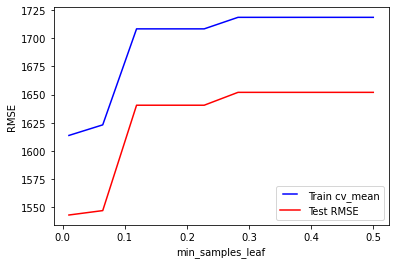

In [139]:
min_samples_leafs = np.linspace(0.01, 0.5, 10, endpoint=True)
'''
max_depths=[1, 1e2, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
min_samples_leafs = np.linspace(0.1, 0.5, 10, endpoint=True)
'''
train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
    
    # define model
    model = DecisionTreeRegressor(min_samples_leaf=min_samples_leaf)
    
    rmse, cvmean = decision_tree_regression_tune(model, X_train, y_train, X_test, y_test)
    train_results.append(cvmean)
    test_results.append(rmse)
    

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train cv_mean')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMSE')
plt.xlabel('min_samples_leaf')
plt.show()
            

In the next part of the analysis, let's choose values between 0.01 and 0.011.

### Best Results
Run the model with a smaller set of values for each of the parameters.

In [140]:
# function 
def decision_tree_regression(X_train, y_train, X_test, y_test, max_depth, min_samples_split, min_samples_leaf):
    
    # define model
    model = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
    
    # fit algorithm to data
    model.fit(X_train, y_train)
    
    # predict training set
    val_predictions = model.predict(X_test)
    
    # RSME 
    RMSE=np.sqrt(metrics.mean_squared_error(y_test, val_predictions))

    # cross validation
    cv_score = cross_val_score(model, X_train, y_train, cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    return (RMSE, np.mean(cv_score), max_depth, min_samples_leaf)

In [141]:

# set the different values of max_depth and min_samples_leaf to be tested
max_depths = np.linspace(1, 30, 10, endpoint=True) 
min_samples_splits = np.linspace(0.001, 0.07, 10, endpoint=True)
min_samples_leafs = np.linspace(0.01, 0.011, 10, endpoint=True) 

training_score = []
test_score = []
depth = []
leaf = []
# run models
for max_depth in max_depths:
    for min_samples_split in min_samples_splits:
        for min_samples in min_samples_leafs:
            trainres, testres, depthres, leafres = decision_tree_regression(X_train, y_train, X_test, y_test, 
                                                                            max_depth, min_samples_split, min_samples)
            training_score.append(trainres)
            test_score.append(testres)
            depth.append(depthres)
            leaf.append(leafres)




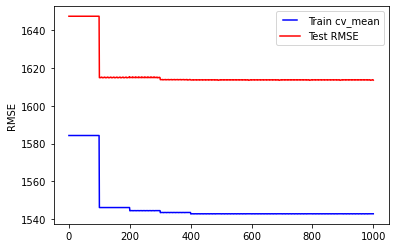

In [142]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(np.linspace(0,len(training_score),len(training_score)), training_score, 'b', label='Train cv_mean')
line2, = plt.plot(np.linspace(0,len(test_score),len(test_score)), test_score, 'r', label='Test RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMSE')
#plt.xlabel('Tree depth')
plt.show()

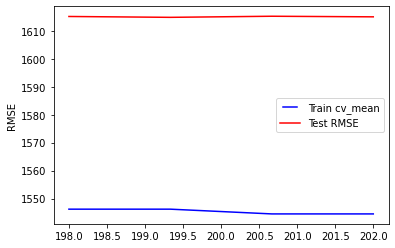

In [143]:
from matplotlib.legend_handler import HandlerLine2D
yytrain = training_score[198:202]
yytest = test_score[198:202]
xx = np.linspace(198, 202, len(yytrain))

line1, = plt.plot(xx, yytrain, 'b', label='Train cv_mean')
line2, = plt.plot(xx, yytest, 'r', label='Test RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMSE')
#plt.xlabel('Tree depth')
plt.show()

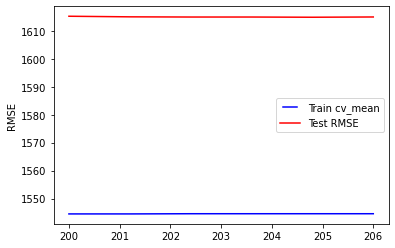

In [144]:
from matplotlib.legend_handler import HandlerLine2D
yytrain = training_score[200:206]
yytest = test_score[200:206]
xx = np.linspace(200, 206, len(yytrain))

line1, = plt.plot(xx, yytrain, 'b', label='Train cv_mean')
line2, = plt.plot(xx, yytest, 'r', label='Test RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMSE')
#plt.xlabel('Tree depth')
plt.show()

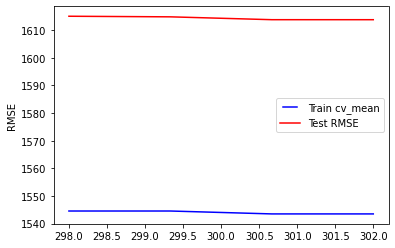

In [145]:
from matplotlib.legend_handler import HandlerLine2D
yytrain = training_score[298:302]
yytest = test_score[298:302]
xx = np.linspace(298, 302, len(yytrain))

line1, = plt.plot(xx, yytrain, 'b', label='Train cv_mean')
line2, = plt.plot(xx, yytest, 'r', label='Test RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMSE')
#plt.xlabel('Tree depth')
plt.show()

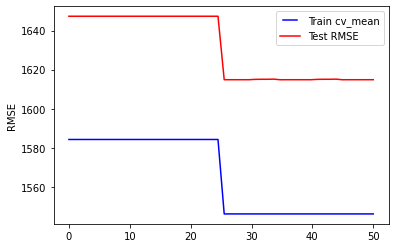

In [146]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(np.linspace(0,len(training_score[75:125]),len(training_score[75:125])), training_score[75:125], 'b', label='Train cv_mean')
line2, = plt.plot(np.linspace(0,len(test_score[75:125]),len(test_score[75:125])), test_score[75:125], 'r', label='Test RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMSE')
#plt.xlabel('Tree depth')
plt.show()

From this graph we have two interesting observations:
1. at around 200 on the x-axis, the model have a very similar error value for the train and test predictions.
2. afer 200, many values for the parameters wold work.

In [147]:
# find the first smallest RMSE occurance
np.argmin(test_score)

490

In [148]:
np.argmin(training_score)

601

In [149]:
test_score[np.argmin(test_score)]

1613.4271670826506

In [150]:
test_score[np.argmin(training_score)]

1613.6403221572455

In [151]:
training_score[np.argmin(training_score)]

1542.8220794157494

In [152]:
training_score[np.argmin(test_score)]

1542.8914114029226

Since the values are not so different, we take the simplest model.

In [153]:
depth[np.argmin(training_score)]

20.333333333333336

In [154]:
depth[np.argmin(test_score)]

13.88888888888889

In [155]:
leaf[np.argmin(training_score)]

0.01011111111111111

In [156]:
leaf[np.argmin(test_score)]

0.01


Model Report
Validation dataset RMSE: 1543
CV score: Mean and 95% confidence interval  - 1614 (+/- 129.17)| Std - 64.58 | Min - 1468 | Max - 1707


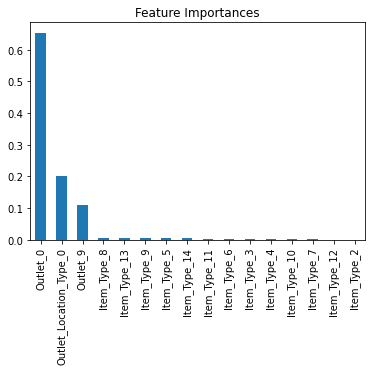

In [157]:
from sklearn.tree import DecisionTreeRegressor

filename = './model8.csv'
model8 = DecisionTreeRegressor(max_depth=depth[np.argmin(test_score)], min_samples_leaf=leaf[np.argmin(test_score)])
modelfit(model8, X_train, X_test, y_train, y_test, test, IDcols, target, filename)

# visualise result
coef8 = pd.Series(model8.feature_importances_, X_train.columns).sort_values(ascending=False)
coef8.plot(kind='bar', title='Feature Importances')





## Neural Network

We tested the following learning rates: 0.00000001, 0.0000001, 0.000001, 0.001, 0.01, 1

and the following network architectures: 
(the table below shows the validation set RMSE)


| Layers \ Nodes/layer | 10        | 100  | 500  | 1000 | 5000 |
| -------------------- |:---------:|:----:|:----:|:----:|:----:|
| 1                    | 1111/1105 | 1104 | 1103 | 1103 | 1104 |
| 2                    | 1109      | 1117 | 1100 |   -  | 1101 |
| 3                    | 1153      | 1101 | 1106 |   -  | 1134 |

The architechture that gives the best resut is 3 layers with 100 nodes each.

In [177]:
# import data
train_s = pd.read_csv('./train_s.csv')
test_s = pd.read_csv('./test_s.csv')

train_s = train_s.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)
test_s = test_s.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)

# separate data into train and test sets
from sklearn.model_selection import train_test_split

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(train_s.loc[:, train_s.columns != 'Item_Outlet_Sales'], train_s['Item_Outlet_Sales'], test_size=0.2, random_state=42)

# get chosen features
file = './features.txt'
with open(file, 'r') as f:
    features = f.readlines()
features = [x[:-1] for x in features]    

file = './not_features.txt'
with open(file, 'r') as f:
    not_features = f.readlines()
not_features = [x[:-1] for x in not_features]    

X_train_s = X_train_s.drop(not_features, axis=1)
X_test_s = X_test_s.drop(not_features, axis=1)
test_s = test_s.drop(not_features, axis=1)


In [204]:
# import modules
# Import necessary modules
import tensorflow.keras.models as keras
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping

from sklearn.model_selection import cross_val_score
from sklearn import metrics

# define variables
from sklearn.model_selection import cross_val_score
from sklearn import metrics

ModuleNotFoundError: No module named 'tensorflow'

In [203]:
# define functions
from tensorflow.keras.Sequential import Sequential
def get_new_model(layers=1, nodes=100):
    
    # Set up the model: model
    model = Sequential()

    # Add the first layer
    model.add(Dense(nodes, activation='relu', input_shape=(n_cols,)))
    
    # Add mode layers
    if layers==2:
        model.add(Dense(100, activation='relu'))
    elif layers==3:
        model.add(Dense(100, activation='relu'))
        model.add(Dense(100, activation='relu'))
    elif layers==4:
        model.add(Dense(n_rows, activation='relu'))
        model.add(Dense(n_rows, activation='relu'))
        model.add(Dense(n_rows, activation='relu'))
        model.add(Dense(n_rows, activation='relu'))

    # Add the output layer
    model.add(Dense(1))

    return(model)


def modelfit(model, lr, predictors, predictors_test, target, target_test):
     
    # Create SGD optimizer with specified learning rate: my_optimizer
    my_optimizer = SGD(lr=lr)
    
    # Compile the model
    model.compile(optimizer=my_optimizer, loss='mean_squared_error', metrics=['MSE'])
    
    # Define early_stopping_monitor
    early_stopping_monitor = EarlyStopping(patience=2)

    # Fit the model
    model.fit(predictors, target, epochs=100, callbacks=[early_stopping_monitor])
#    hist = model.fit(predictors, target, validation_split=0.3, epochs=100, callbacks=[early_stopping_monitor])
    
    # predict training set
    predictions = model.predict(predictors_test)
    
    # print model report
    print('\nModel Report')
    print('Validation dataset RMSE: %.4g' %np.sqrt(metrics.mean_squared_error(predictions, target_test)))
    
    

ModuleNotFoundError: No module named 'tensorflow'

In [198]:
print(X_train_s.unique())

AttributeError: 'DataFrame' object has no attribute 'unique'

In [199]:
#define variables
predictors = X_train_s
target = y_train_s
n_rows = predictors.shape[0]
n_cols = predictors.shape[1]
lr = 0.000001
layers = 3
nodes = 100


# Build new model to test, unaffected by previous models
model = get_new_model(layers=layers, nodes=nodes)

# fit model
modelfit(model, lr, predictors, X_test_s, target, y_test_s)

# Create the plot
plt.plot(model.history.history['mean_squared_error'], 'r')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.title('Layers = {}, nodes/layer = {}'.format(layers, nodes))
plt.show()

AttributeError: 'MLPRegressor' object has no attribute 'add'